# Sprint 5: Train -Test con Boston Housing Data

**<h1>Descripción</h1>** 

**<b><h3>Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas del suburbio de Houston.</h3></b>**

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Dividir los datos en Train y Test, así como el preprocesamiento y transformación de los datos para la aplicación de análisis descritivos y visualización.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo. 
 
 **Ejercicio 2** : Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).  

 **Ejercicio 3** : Resume las nuevas columnas generadas de forma estadística y gráfica.
</div>

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

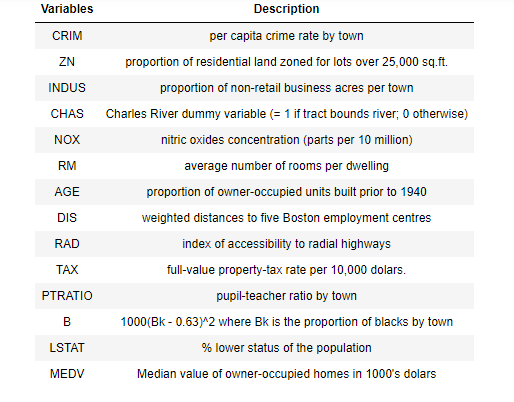

**Fuente:**

    (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.                
    (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.                 
    (c) Date: July 7, 1993

---

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno

# Import the module for the split
from sklearn.model_selection import train_test_split

#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

#Import the module for the preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h2>Carga del Dataset</h2></b> 
</div>

In [2]:
housing_data= pd.read_csv('housing data.csv',  header=None)
housing_data

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<h3>Observaciones:</h3>

   *  El dataset posee 506 filas y 14 columnas. 
   *  Se puede observar que todas las variables son tipos numéricas. 
   *  Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.    
   *  No posee los nombres de las variables o columnas, por lo que se procederá a colocarle los nombres, de acuerdo a la información suministrada(housing data description).  

## 1. Preparación del Dataset

### 1.1. Agregar los nombres de las variables o columnas

In [4]:
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data.columns = header
housing_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

### 1.2 Verificar nulos y NaM

In [5]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
housing_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* Como se pueden observar no hay valores faltantes ni NAN en el dataset, comprobando la información suministrada. La gráfica es una manera visual de verificar la distribucción de los valores faltantes en un dataset. 

<AxesSubplot:>

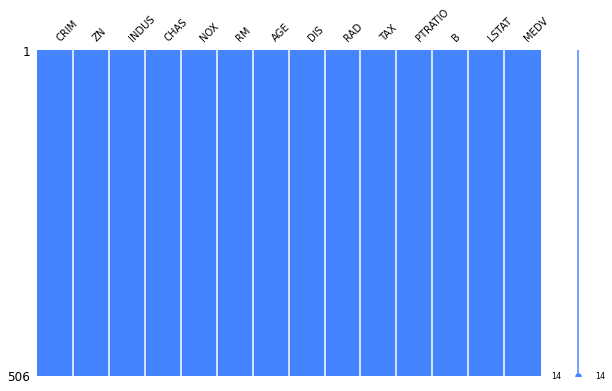

In [7]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(housing_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

### 1.3 Verificar Duplicados

In [8]:
housing_data[housing_data.duplicated()]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.      

### 1.4 Descripción estadistica y visualización global de las variables.

Si el dataset se utilizaría para predecir precios de casas en los suburbios de Boston, el atributo MEDV sería el target. En tal sentido para el analisis se escogerá el atributo MEDV como el target del modelo. 

Se crearán unos gráficos de dispersión de los atributos en función del atributo MEDV para ver su relación.

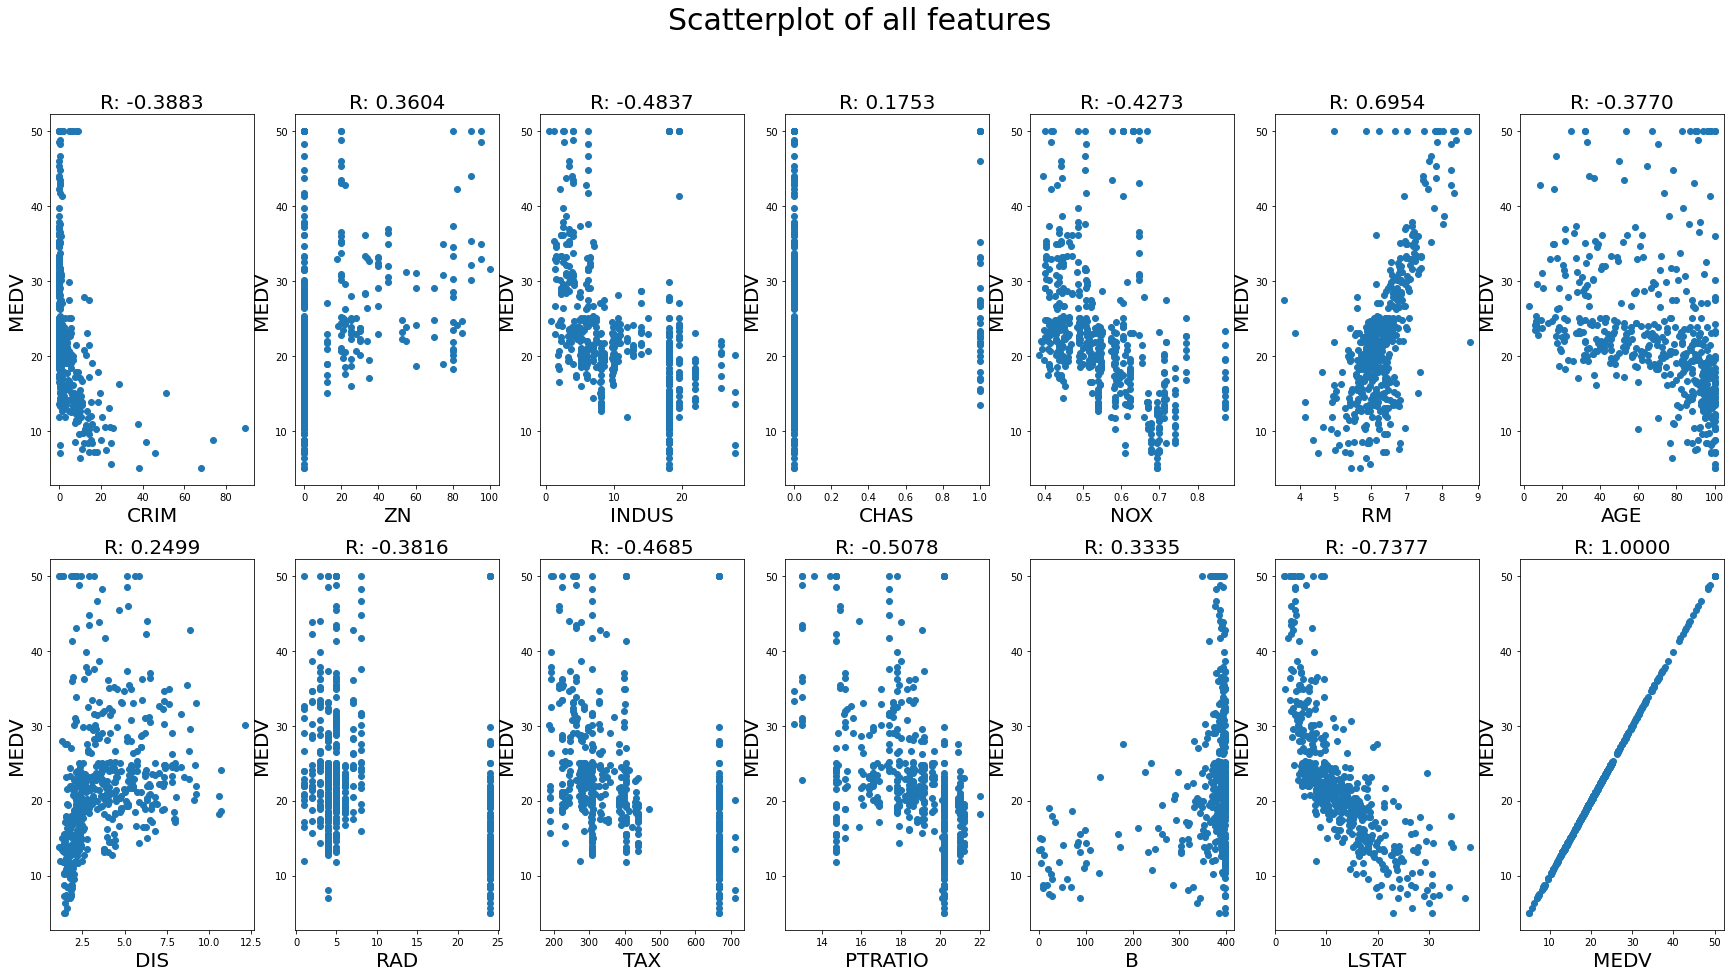

In [9]:
## Column indexer
col_idx = 0

## Create plots with seven columns and two rows
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(30,15))

## Loop through each subplot to make scatterplot 
for i in range(2):
      for j in range(7):
        col = housing_data.iloc[:,col_idx].name
        axes[i, j].plot(housing_data[col], housing_data.MEDV, 'o', color='tab:blue')
        axes[i, j].set_xlabel(housing_data.columns[col_idx], fontsize=20)
        axes[i, j].set_ylabel('MEDV', fontsize=20)
        axes[i, j].set_title('R: {:.4f}'.format(housing_data[['MEDV', col]].corr().iloc[0, 1]), fontsize=20)
        fig.suptitle('Scatterplot of all features', fontsize=30)
        col_idx += 1

* Se observa que muchos atributoss tienen poca correlación con la variable MEDV(Valor medio de las viviendas ocupadas). 
* Los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente. 
* Adicionalmente se observa que los atributos  CHAS y RAS tienen valores enteros discretos, el RAD se caracteriza por ser ordinaria categórica, esto significa que estos pueden ser grupos específicos definidos en el conjunto de datos, lo cual se puede ver en el diagrama de dispersión anterior, ya que estas columnas forman líneas rectas verticales, es decir, se definirían como variables categóricas.

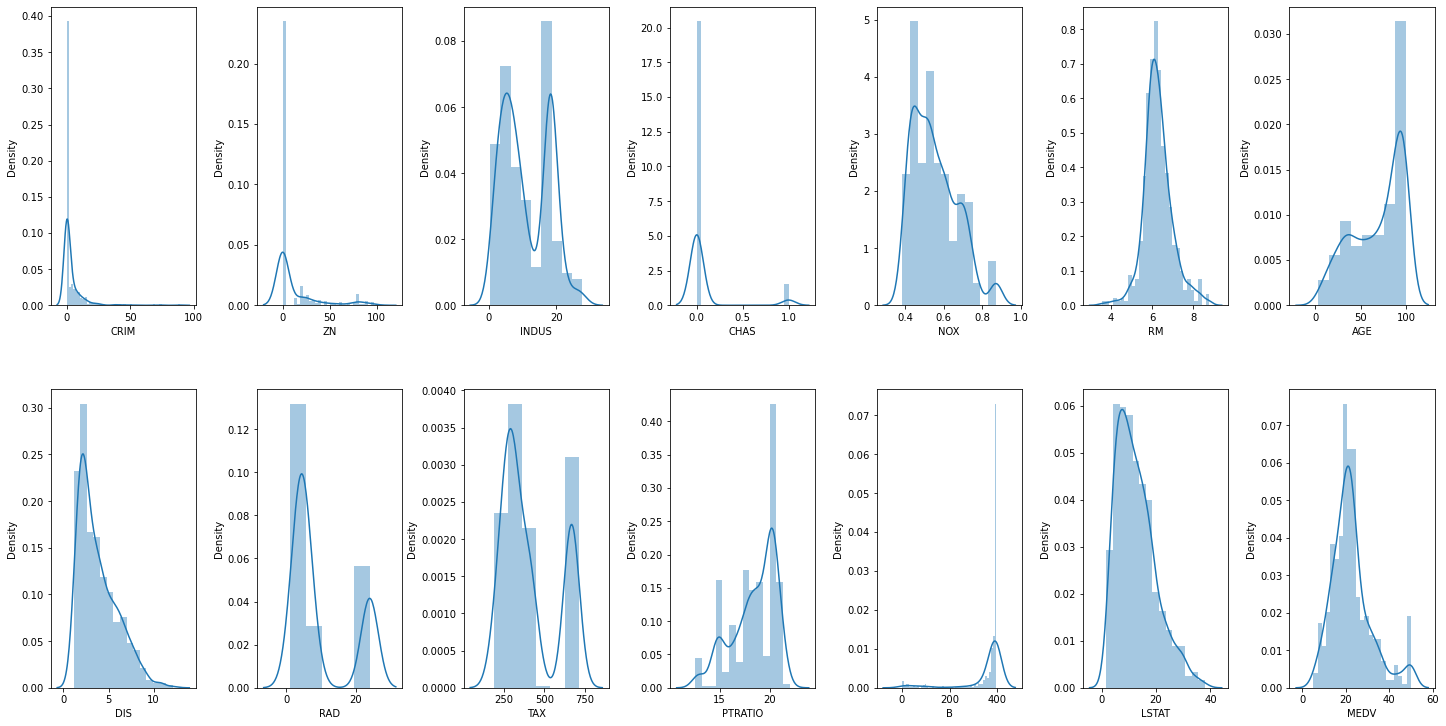

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

El histograma también muestra que las columnas CRIM, ZN, B tienen distribuciones muy asimétricas. También MEDV parece tener una distribución normal (El target).

### Análisis de los atributos numéricos (excluyendo CHAS y RAD).

In [11]:
cont_data = housing_data.select_dtypes('float64')
cont_data

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   
..       ...   ...    ...    ...    ...   ...     ...    ...      ...     ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273.0     21.0  391.99   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273.0     21.0  396.90   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273.0     21.0  396.90   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273.0     21.0  393.45   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  273.0     21.0  396.90   

     LSTAT  MEDV  
0     4.98  24.0  
1     9.14  21.6  
2     4.03  34.7  
3     2.94  33.4  
4     5.33  36.2  
..     ...   ...  
501   9.67  22.4  
502   9.08  20.6  
503   5.64  23.9  
504   6.48  22.0  
505   7.88  11.9  

[506 rows x 12 columns]

In [12]:
def estadisticos_num(cont_data):
    #Calculamos describe
    estadisticos = cont_data.describe().round(3).T
    #Añadimos la mediana
    estadisticos['median'] = cont_data.median().round(3)
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_num(cont_data)

count     mean   median      std      min      25%      50%      75%  \
CRIM     506.0    3.614    0.257    8.602    0.006    0.082    0.257    3.677   
ZN       506.0   11.364    0.000   23.322    0.000    0.000    0.000   12.500   
INDUS    506.0   11.137    9.690    6.860    0.460    5.190    9.690   18.100   
NOX      506.0    0.555    0.538    0.116    0.385    0.449    0.538    0.624   
RM       506.0    6.285    6.208    0.703    3.561    5.885    6.208    6.624   
AGE      506.0   68.575   77.500   28.149    2.900   45.025   77.500   94.075   
DIS      506.0    3.795    3.207    2.106    1.130    2.100    3.207    5.188   
TAX      506.0  408.237  330.000  168.537  187.000  279.000  330.000  666.000   
PTRATIO  506.0   18.456   19.050    2.165   12.600   17.400   19.050   20.200   
B        506.0  356.674  391.440   91.295    0.320  375.378  391.440  396.225   
LSTAT    506.0   12.653   11.360    7.141    1.730    6.950   11.360   16.955   
MEDV     506.0   22.533   21.200    9.197    5.000   17.025   21.200   25.000   

             max  
CRIM      88.976  
ZN       100.000  
INDUS     27.740  
NOX        0.871  
RM         8.780  
AGE      100.000  
DIS       12.126  
TAX      711.000  
PTRATIO   22.000  
B        396.900  
LSTAT     37.970  
MEDV      50.000

<h3>Observaciones:</h3>

 *  Se observa que la media y mediana de los precios de las casas son muy cercanas 22.533 y 21.20 respectivamnete.
 *  Se observa que algunas variables como ZN y CRIM poseen una desviación estandar mayor que la media, se puede inferir una mayor dispersión de los datos. 

* **Exploración gráfica de las variables numéricas**

Se observa que algunas variable podrían seguir una distribución normal, con corrrelaciones positivas y negativas.

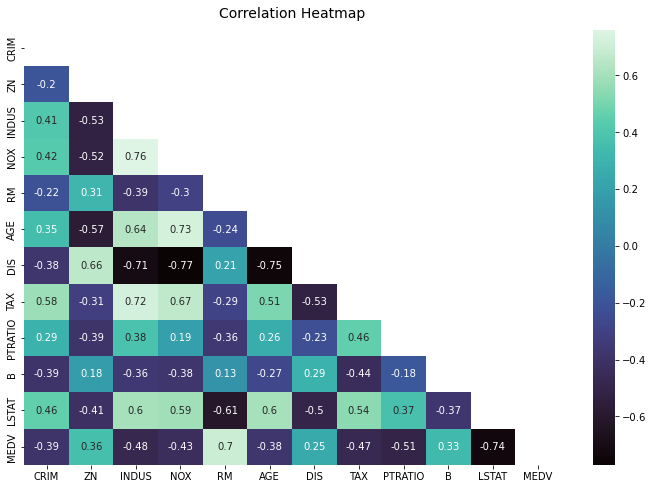

In [14]:
plt.figure(figsize=(12, 8))

housing_corr_num = housing_data.drop(['CHAS','RAD'], axis=1)

mask = np.triu(np.ones_like(housing_corr_num.corr().round(2))) 

ax= sns.heatmap(housing_corr_num.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que algunos atributos en el conjunto de datos están tan fuertemente correlacionados postivamente o negativamente, sin embargo solo los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente con el atributo target (MEDV). Se infiere que la mayoria de las variables no distribuyen normalmente.
</div>

### Análisis de los atributos categóricos.

Ahora se analizará las variables categóricas, en esta sección se incluye los atributos "CHAS" y "RAD". 

In [15]:
cols = ['CHAS', 'RAD']

for i in cols: 
    housing_data[i] = housing_data[i].astype('category')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [16]:
cat = housing_data.select_dtypes('category')
cat

CHAS RAD
0      0   1
1      0   2
2      0   2
3      0   3
4      0   3
..   ...  ..
501    0   1
502    0   1
503    0   1
504    0   1
505    0   1

[506 rows x 2 columns]

In [17]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [18]:
frecuencias_cat(cat)

Variable  Valor  Frecuencia
1      CHAS      1    0.069170
0      CHAS      0    0.930830
8       RAD      7    0.033597
2       RAD      1    0.039526
3       RAD      2    0.047431
9       RAD      8    0.047431
7       RAD      6    0.051383
4       RAD      3    0.075099
5       RAD      4    0.217391
6       RAD      5    0.227273
10      RAD     24    0.260870

In [19]:
cat.nunique()

CHAS    2
RAD     9
dtype: int64

<h3>Observaciones:</h3>

   * En este resúmen se puede identificar rápidamente los valores más frecuentes de cada característica y el número de veces que aparecen. 
   * El atributo "CHAS" tiene dos valores unico, siendo el de mayor frecuencia el numero 0. 
   * El atributo "RAD" tiene 9 valores y los que mas se repiten son los numero 4, 5 y 24.

* **Exploración gráfica de las variables categoricas**

In [20]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

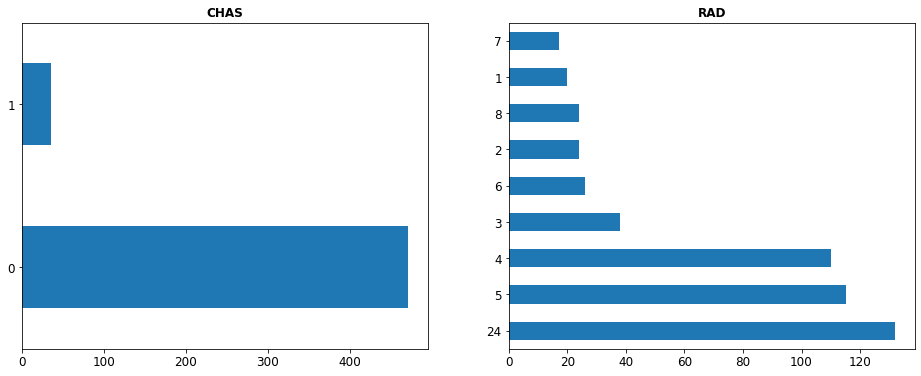

In [21]:
graficos_eda_categoricos(cat)

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que en el atributo "CHAS" la mayor frecuencia es que las casas no limitan con el rio, mientras que en el  atributo "RAD" los radios para el acceso a las autopista que más frecuentes se encuentran las casas son de 4,5 y 24, en este sentido se puede evaluar esta atributo creando una variable nueva "RAD_Clases, en donde se puede agrupar las menos menores de 24 en una clase y las iguales a 24 en otra clase.
</div>

<div class="alert alert-block alert-info">
<b>Ejercicio 1:</b> Divide el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.
</div>

* Se dividirá el conjunto de datos en el entrenamiento y la prueba, se separará los datos en 70% por el train y 30% por el test.

In [22]:
# use 80% for training and 20% for test
data_train, data_test = train_test_split(housing_data, test_size= 0.3, random_state= 2)

In [23]:
data_train.shape

(354, 14)

In [24]:
data_test.shape

(152, 14)

### Análisis de los atributos numéricos

In [25]:
# Train data
num_data_train = data_train.select_dtypes('float64')
num_data_train

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
485  3.67367   0.0  18.10  0.583  6.312  51.9  3.9917  666.0     20.2  388.62   
275  0.09604  40.0   6.41  0.447  6.854  42.8  4.2673  254.0     17.6  396.90   
155  3.53501   0.0  19.58  0.871  6.152  82.6  1.7455  403.0     14.7   88.01   
350  0.06211  40.0   1.25  0.429  6.490  44.4  8.7921  335.0     19.7  396.90   
119  0.14476   0.0  10.01  0.547  5.731  65.2  2.7592  432.0     17.8  391.50   
..       ...   ...    ...    ...    ...   ...     ...    ...      ...     ...   
22   1.23247   0.0   8.14  0.538  6.142  91.7  3.9769  307.0     21.0  396.90   
72   0.09164   0.0  10.81  0.413  6.065   7.8  5.2873  305.0     19.2  390.91   
493  0.17331   0.0   9.69  0.585  5.707  54.0  2.3817  391.0     19.2  396.90   
15   0.62739   0.0   8.14  0.538  5.834  56.5  4.4986  307.0     21.0  395.62   
168  2.30040   0.0  19.58  0.605  6.319  96.1  2.1000  403.0     14.7  297.09   

     LSTAT  MEDV  
485  10.58  21.2  
275   2.98  32.0  
155  15.02  15.6  
350   5.98  22.9  
119  13.61  19.3  
..     ...   ...  
22   18.72  15.2  
72    5.52  22.8  
493  12.01  21.8  
15    8.47  19.9  
168  11.10  23.8  

[354 rows x 12 columns]

In [26]:
estadisticos_num(num_data_train)

count     mean   median      std      min      25%      50%      75%  \
CRIM     354.0    3.351    0.240    8.795    0.006    0.083    0.240    3.520   
ZN       354.0   10.417    0.000   21.661    0.000    0.000    0.000   12.500   
INDUS    354.0   11.278    9.795    6.879    0.460    5.190    9.795   18.100   
NOX      354.0    0.554    0.538    0.115    0.392    0.450    0.538    0.624   
RM       354.0    6.294    6.202    0.719    3.561    5.907    6.202    6.618   
AGE      354.0   69.281   77.000   27.396    6.000   46.825   77.000   94.075   
DIS      354.0    3.790    3.207    2.127    1.130    2.108    3.207    5.113   
TAX      354.0  405.655  330.000  167.806  187.000  277.000  330.000  666.000   
PTRATIO  354.0   18.511   19.050    2.081   12.600   17.400   19.050   20.200   
B        354.0  355.580  391.770   92.956    0.320  375.240  391.770  395.915   
LSTAT    354.0   12.633   11.375    7.001    1.920    7.150   11.375   17.158   
MEDV     354.0   22.573   21.200    9.157    5.000   17.125   21.200   24.950   

             max  
CRIM      88.976  
ZN       100.000  
INDUS     27.740  
NOX        0.871  
RM         8.780  
AGE      100.000  
DIS       12.126  
TAX      711.000  
PTRATIO   22.000  
B        396.900  
LSTAT     37.970  
MEDV      50.000

In [27]:
num_data_test = data_test.select_dtypes('float64')
num_data_test

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
463   5.82115   0.0  18.10  0.713  6.513  89.9  2.8016  666.0     20.2   
152   1.12658   0.0  19.58  0.871  5.012  88.0  1.6102  403.0     14.7   
291   0.07886  80.0   4.95  0.411  7.148  27.7  5.1167  245.0     19.2   
183   0.10008   0.0   2.46  0.488  6.563  95.6  2.8470  193.0     17.8   
384  20.08490   0.0  18.10  0.700  4.368  91.2  1.4395  666.0     20.2   
..        ...   ...    ...    ...    ...   ...     ...    ...      ...   
30    1.13081   0.0   8.14  0.538  5.713  94.1  4.2330  307.0     21.0   
348   0.01501  80.0   2.01  0.435  6.635  29.7  8.3440  280.0     17.0   
10    0.22489  12.5   7.87  0.524  6.377  94.3  6.3467  311.0     15.2   
283   0.01501  90.0   1.21  0.401  7.923  24.8  5.8850  198.0     13.6   
17    0.78420   0.0   8.14  0.538  5.990  81.7  4.2579  307.0     21.0   

          B  LSTAT  MEDV  
463  393.82  10.29  20.2  
152  343.28  12.12  15.3  
291  396.90   3.56  37.3  
183  396.90   5.68  32.5  
384  285.83  30.63   8.8  
..      ...    ...   ...  
30   360.17  22.60  12.7  
348  390.94   5.99  24.5  
10   392.52  20.45  15.0  
283  395.52   3.16  50.0  
17   386.75  14.67  17.5  

[152 rows x 12 columns]

In [28]:
estadisticos_num(num_data_test)

count     mean   median      std      min      25%      50%      75%  \
CRIM     152.0    4.224    0.340    8.128    0.011    0.070    0.340    5.318   
ZN       152.0   13.569    0.000   26.744    0.000    0.000    0.000   12.500   
INDUS    152.0   10.809    8.350    6.829    1.210    4.820    8.350   18.100   
NOX      152.0    0.557    0.538    0.118    0.385    0.447    0.538    0.647   
RM       152.0    6.262    6.212    0.664    4.368    5.871    6.212    6.638   
AGE      152.0   66.930   78.200   29.857    2.900   38.175   78.200   93.950   
DIS      152.0    3.807    3.199    2.061    1.169    1.999    3.199    5.255   
TAX      152.0  414.250  334.500  170.634  188.000  287.000  334.500  666.000   
PTRATIO  152.0   18.326   19.000    2.351   12.600   16.600   19.000   20.200   
B        152.0  359.222  391.260   87.550    2.600  376.115  391.260  396.900   
LSTAT    152.0   12.700   11.125    7.482    1.730    6.892   11.125   16.312   
MEDV     152.0   22.439   21.050    9.320    5.000   15.975   21.050   26.700   

             max  
CRIM      51.136  
ZN        95.000  
INDUS     27.740  
NOX        0.871  
RM         8.040  
AGE      100.000  
DIS       10.586  
TAX      711.000  
PTRATIO   22.000  
B        396.900  
LSTAT     34.410  
MEDV      50.000

<h3>Observaciones:</h3>

 *  Se observa que existe similitud entre el análisis estadístico general, el del train y el del test, en donde la media y mediana de los precios de las casas son muy cercanas.
 *  Observamos que ambas tablas son bastante similares a la general, algunos valores mínimos y máximos pueden ser diferentes debido a valores atípicos.
 * LA variable objetivo (MEDV) tiene una media de 22.573 en el conjunto de train y 22.439 en el conjunto de test.

* **Exploración gráfica**

<Figure size 864x864 with 0 Axes>

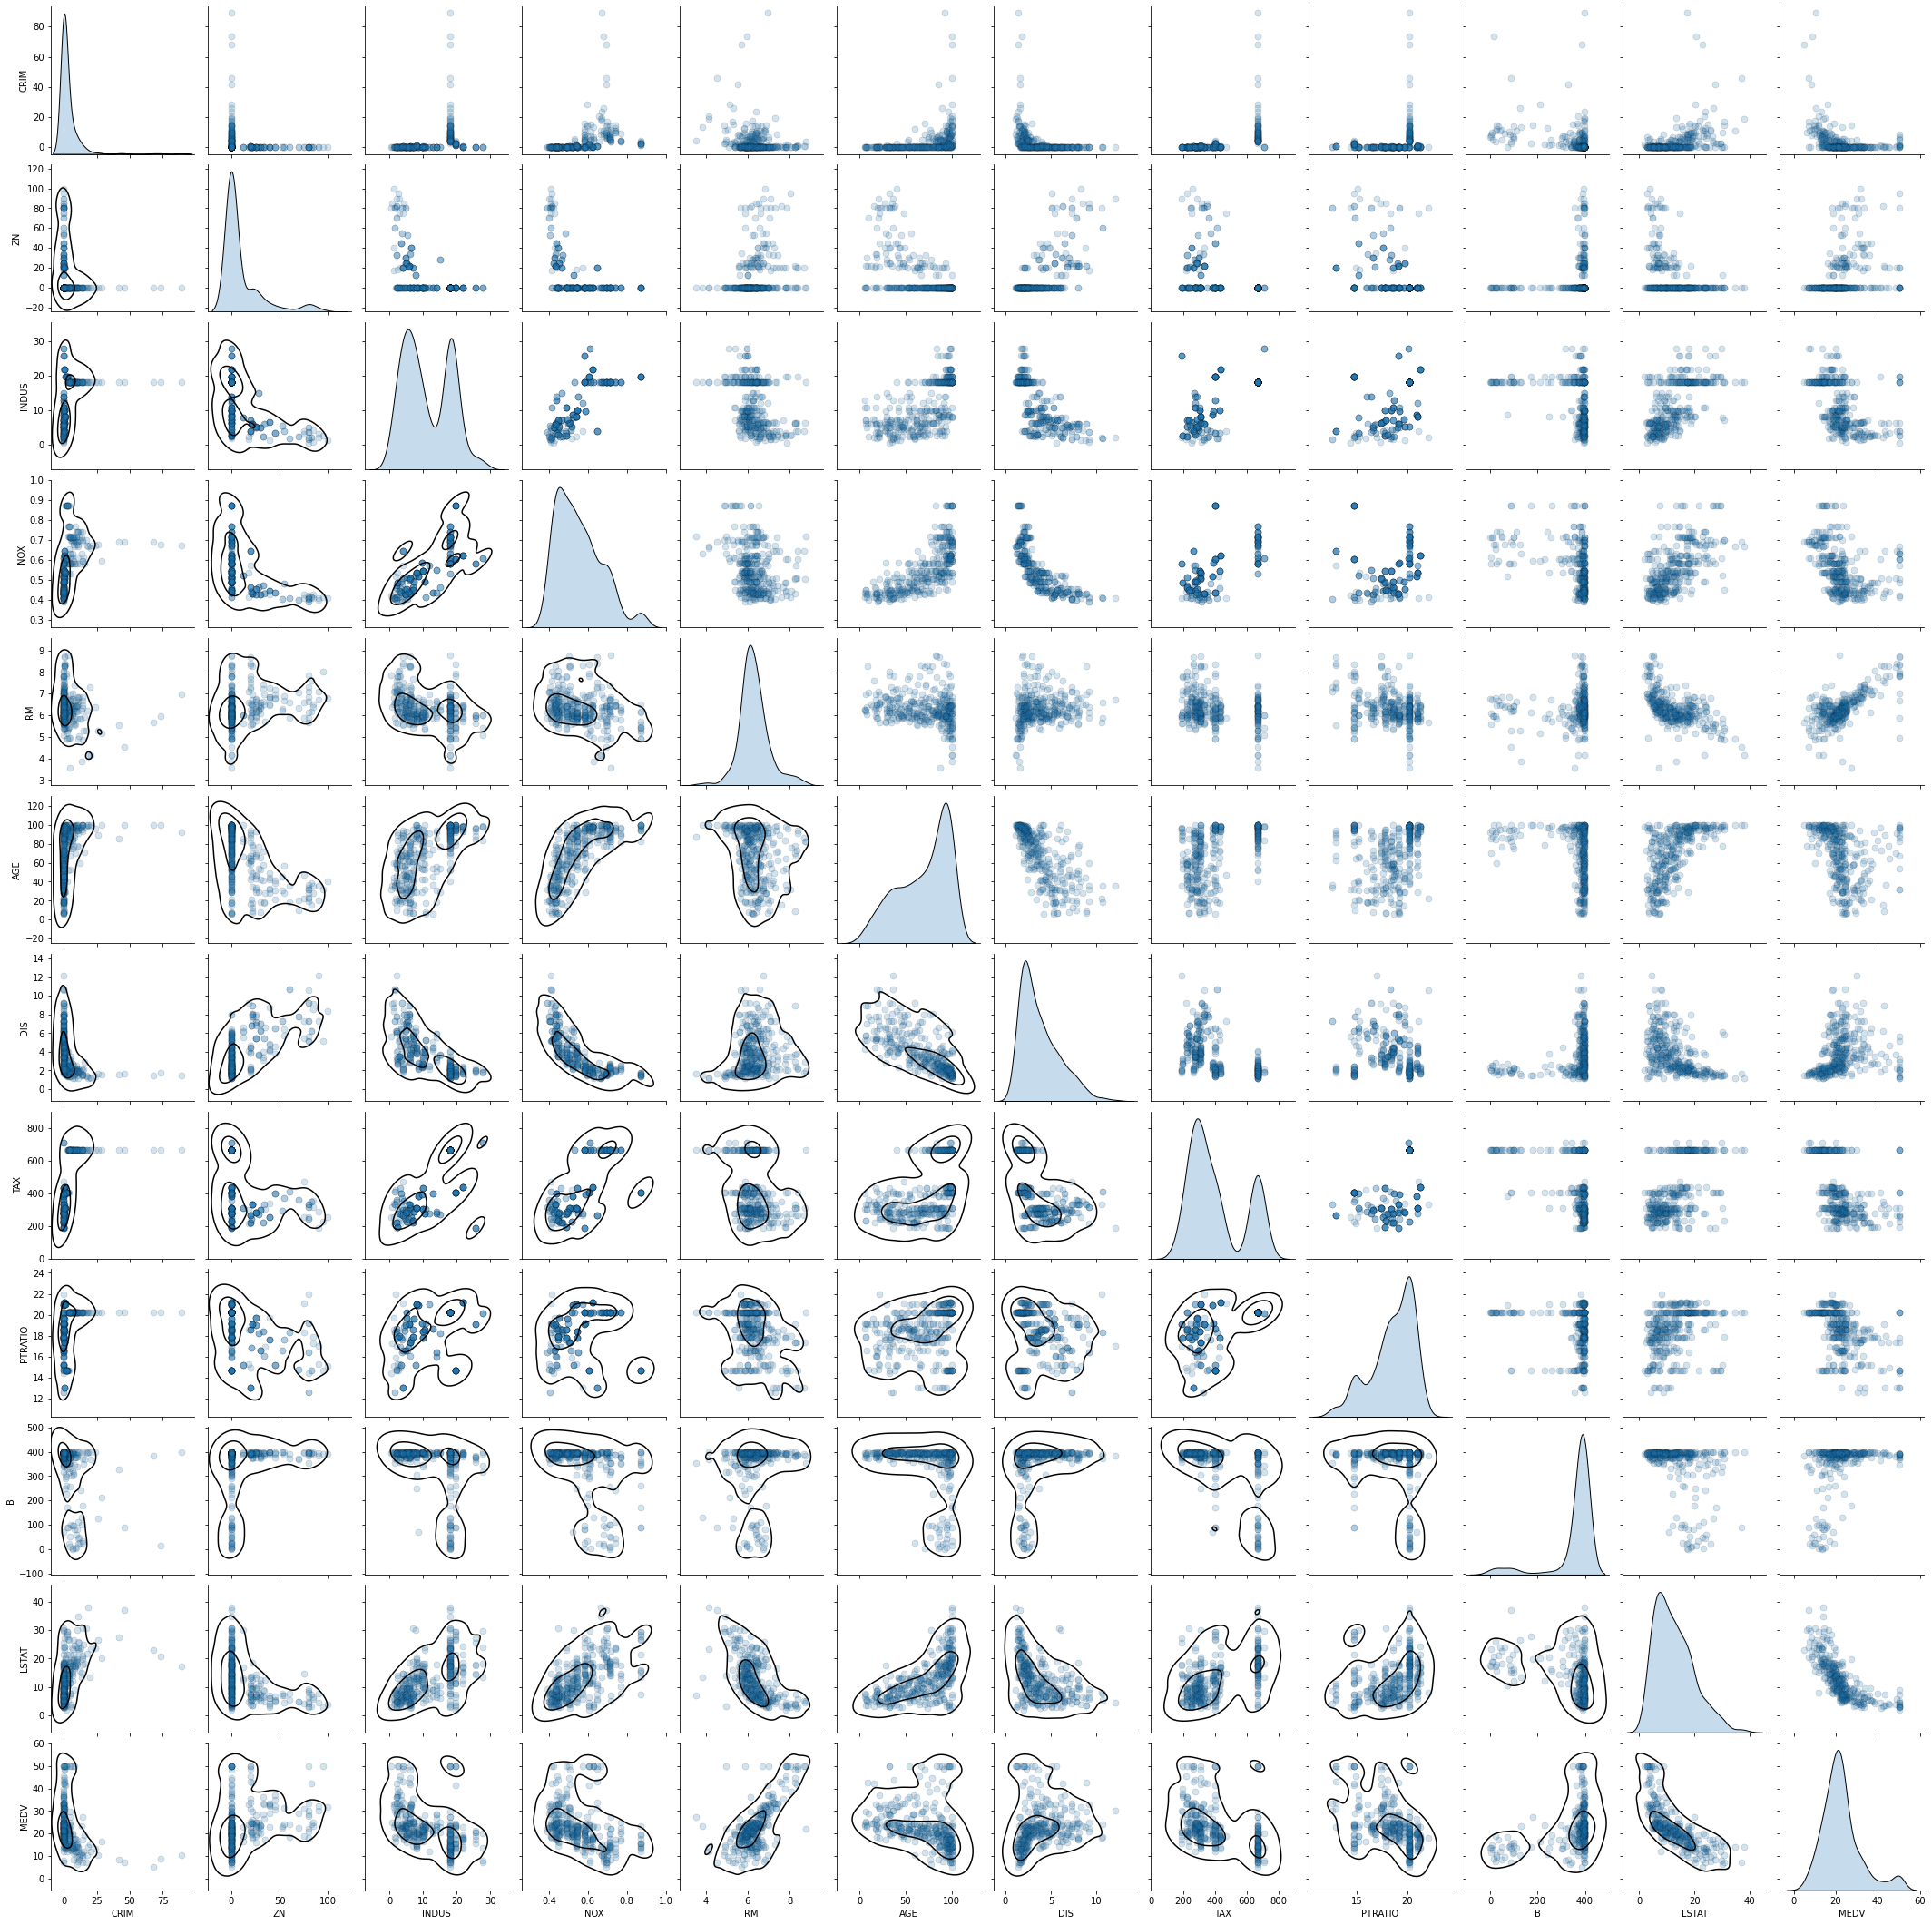

In [29]:
# pairplots on data_train
plt.figure(figsize=(12, 12))

dpalette = sns.color_palette("winter",n_colors = 3)   # matrix scatter plot with points and density estimator
palette = sns.color_palette("winter")

matrixplot = sns.pairplot(num_data_train, diag_kind = 'kde', palette = dpalette, diag_kws={'edgecolor':'black'},
                          plot_kws=dict(s=50, edgecolor="black", linewidth=0.5,alpha=0.2))
matrixplot.map_lower(sns.kdeplot, levels=3, color="black")

plt.show()

<Figure size 864x864 with 0 Axes>

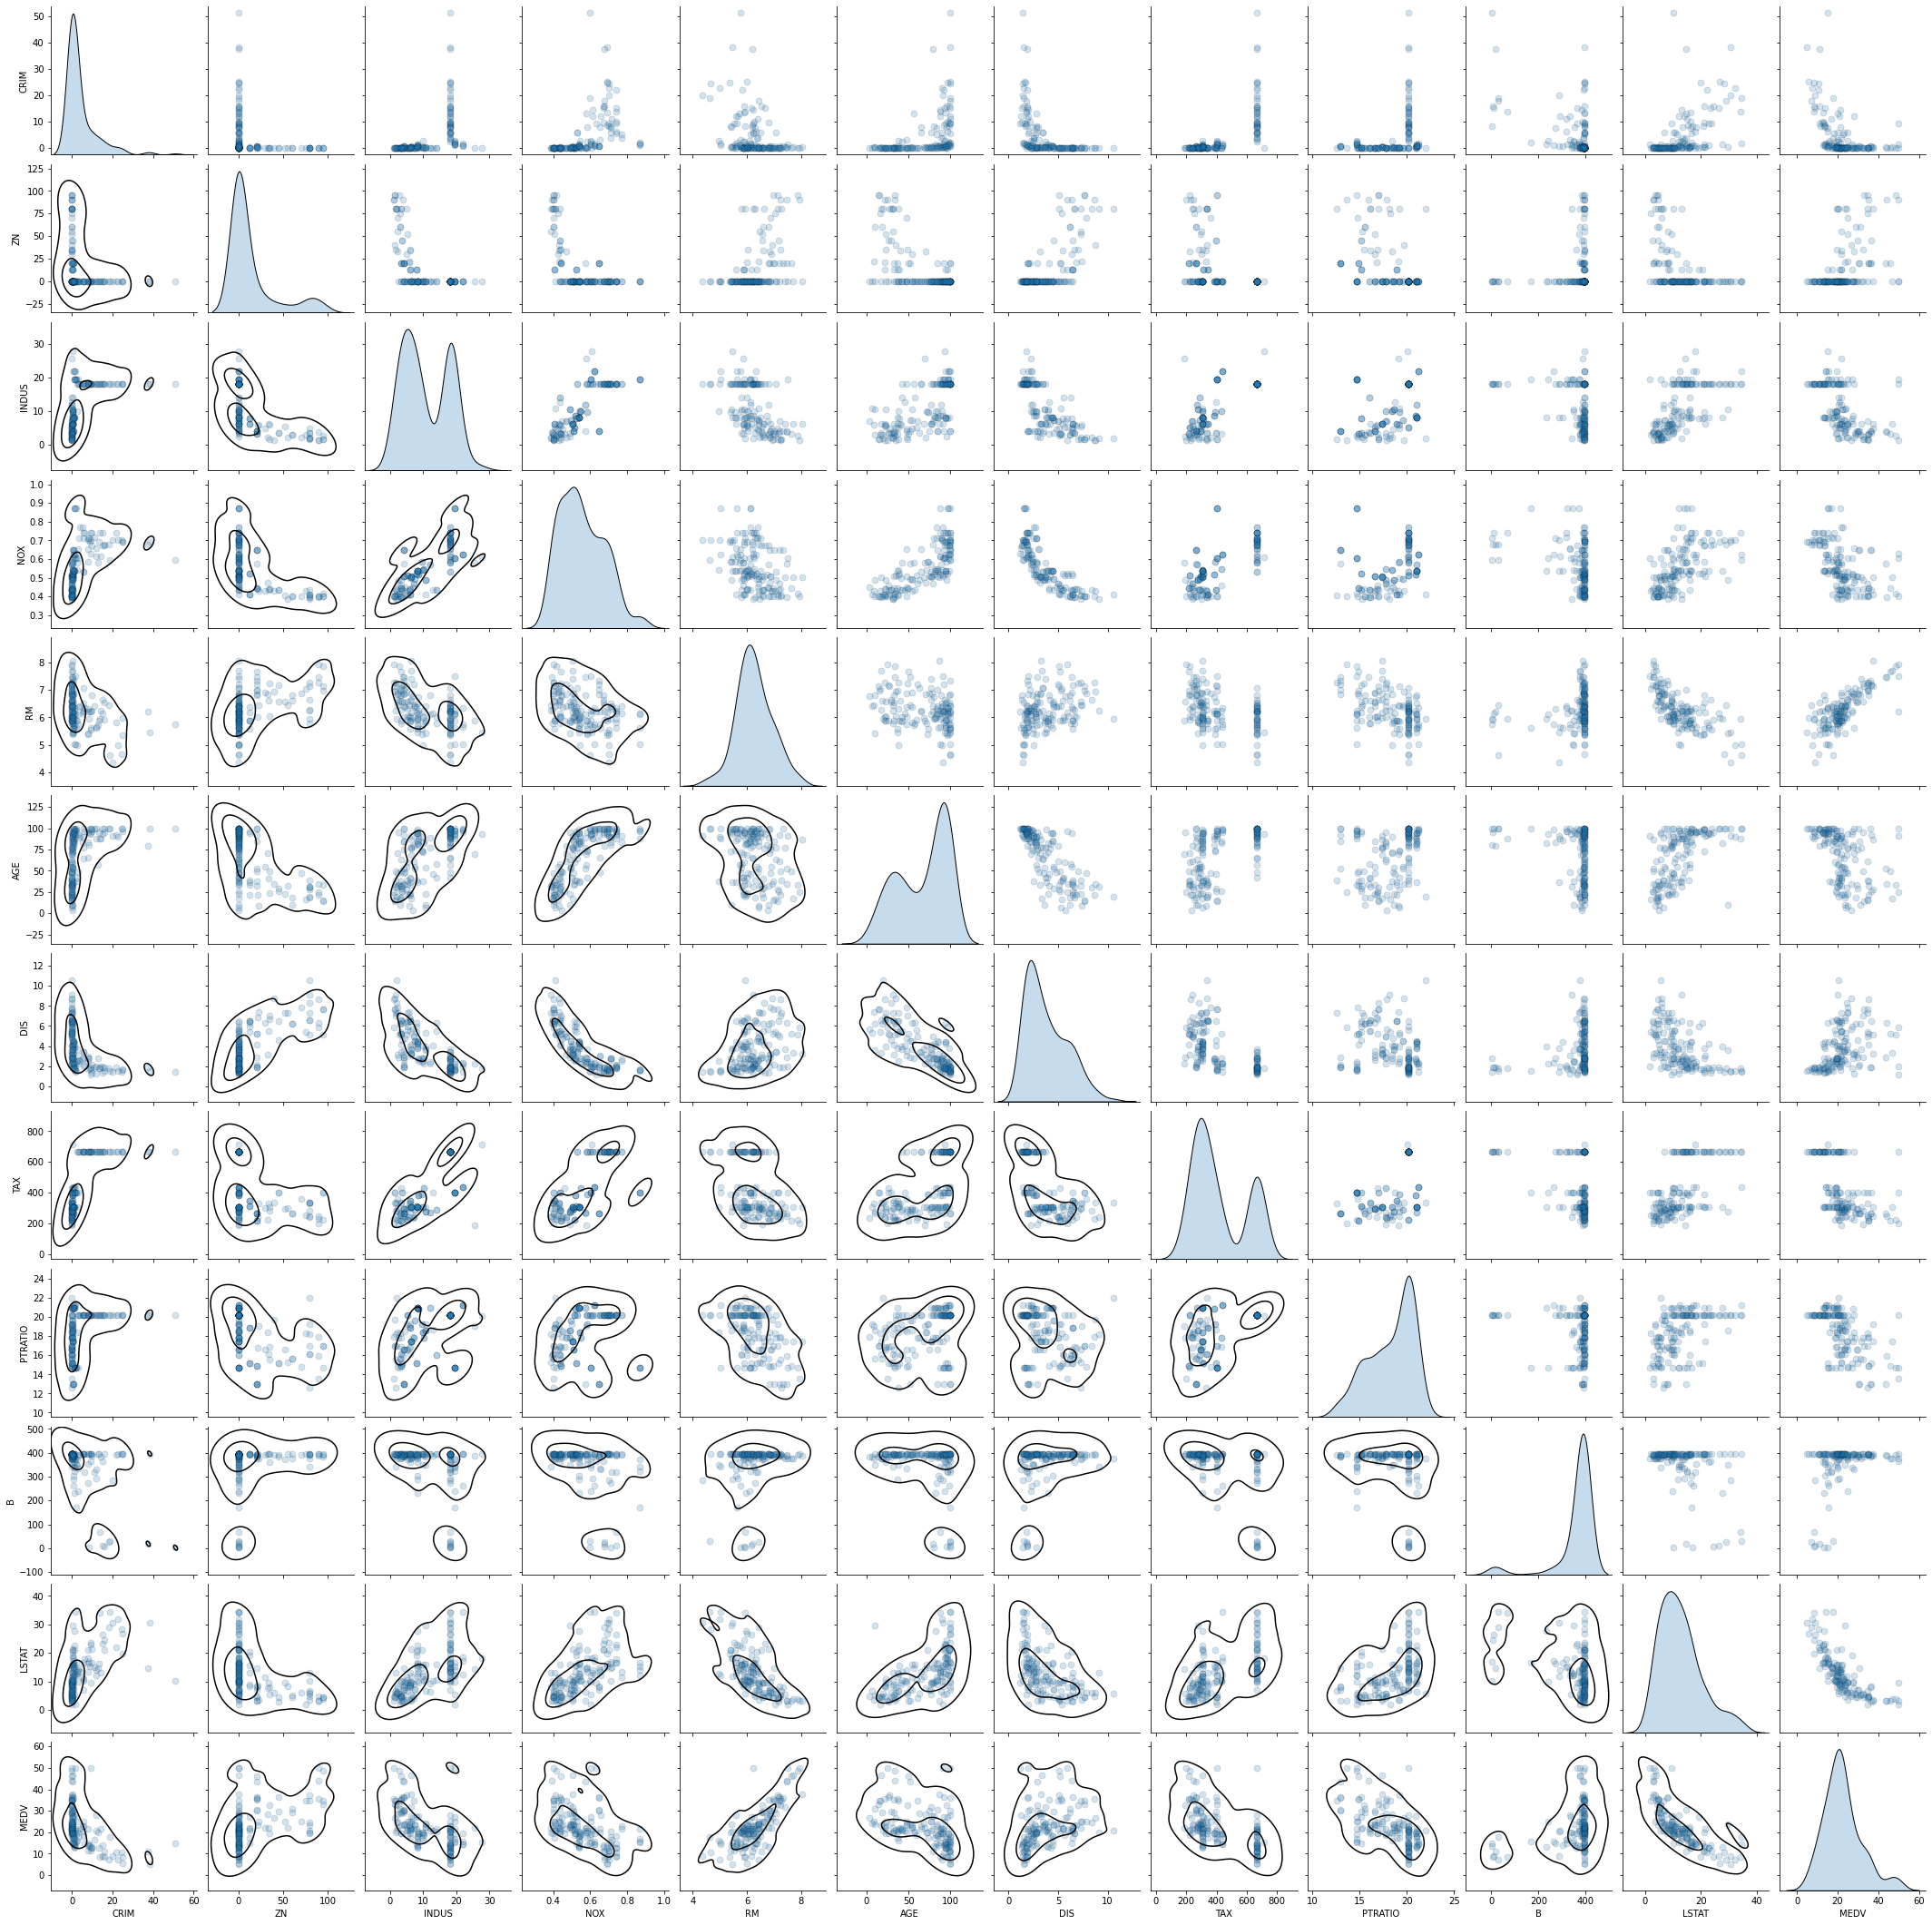

In [30]:
# pairplots on data_test
plt.figure(figsize=(12, 12))

dpalette = sns.color_palette("winter",n_colors = 3)   # matrix scatter plot with points and density estimator
palette = sns.color_palette("winter")

matrixplot = sns.pairplot(num_data_test, diag_kind = 'kde', palette = dpalette, diag_kws={'edgecolor':'black'},
                          plot_kws=dict(s=50, edgecolor="black", linewidth=0.5,alpha=0.2))
matrixplot.map_lower(sns.kdeplot, levels=3, color="black")

plt.show()

Los gráficos de pairplot son similares para ambos sub-conjuntos, en ambos casos se puede ver correlación entre algunas de las variables, sin embargo solo los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente con el atributo target (MEDV)

En la diagonal se puede ver la distribución de cada variable, vemos que algunas variables como ZM y CRIM tienen distribucción asimétrica a la la derecha y B tiene distribuciones asimétricas a la izquierada, esto puede deberse a la presencia de valores atípicos.

Algunas de las variables independientes parecen estar altamente correlacionadas entre sí, tal vez tenga que descartar algunas variables antes de hacer un modelo. Se trazará un mapa de calor y ver la correlación entre las variables:

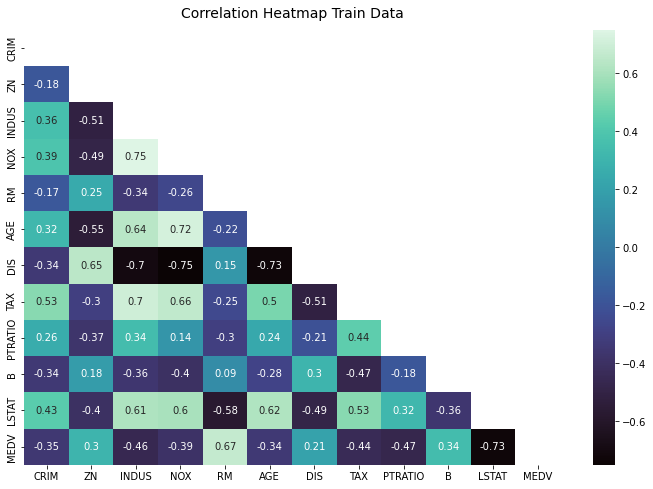

In [31]:
# Heatmap on data_train
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(num_data_train.corr().round(2))) 

ax= sns.heatmap(num_data_train.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap Train Data', fontdict={'fontsize':14}, pad=12);

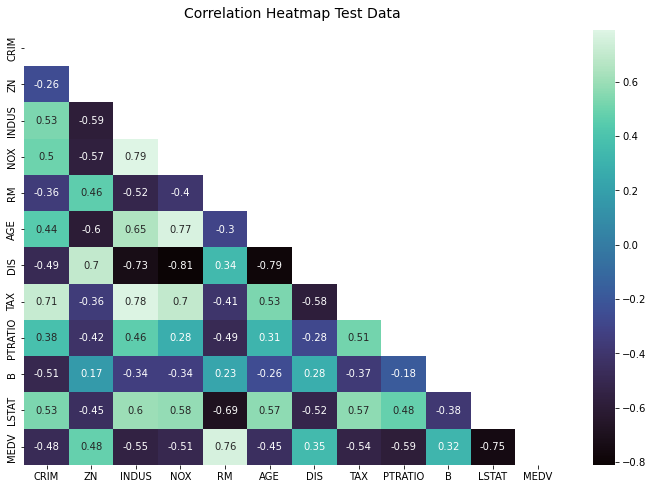

In [32]:
# Heatmap on data_test
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(num_data_test.corr().round(2))) 

ax= sns.heatmap(num_data_test.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap Test Data', fontdict={'fontsize':14}, pad=12);

In [64]:
num_data_test['MEDV'].corr(num_data_test['RM'])

0.7617122112220679

Ambos mapas parecen idénticos y muestran numéricamente las correlaciones que ya se habían visto en los diagramas anteriores. Es claro que existe multicolinealidad entre algunas de las variables independientes.

* **Chequear la multicolinealidad de las variables independientes**.

Se realizará un estudio de la  multicolinealidad de las variables independientes, se utilizará el modelo Un factor de inflación de varianza (VIF), la cual es una medida de la cantidad de multicolinealidad en el análisis de regresión. VIF se utiliza para identificar la correlación de una variable independiente con un grupo de otras variables.

In [38]:
VF_eval=housing_data.copy()

In [39]:
# import module to evaluate multicollinearity from the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we ´ll define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

In [40]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [41]:
calculate_vif(VF_eval, cols)

VIF features
0    2.100373     CRIM
1    2.844013       ZN
2   14.485758    INDUS
3    1.152952     CHAS
4   73.894947      NOX
5   77.948283       RM
6   21.386850      AGE
7   14.699652      DIS
8   15.167725      RAD
9   61.227274      TAX
10  85.029547  PTRATIO
11  20.104943        B
12  11.102025    LSTAT

Se tienen algunos valores VIF muy grandes, mayores a 10. Se estará descartando variables por variables hasta encontrar valores acordes para la evaluacion. **Valor aceptable del VF menor o igual a 10**. 

In [42]:
#drop PRATION variables
VF_eval.drop(columns = ['PTRATIO'], inplace = True)

In [43]:
cols_2=cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']

In [44]:
calculate_vif(VF_eval, cols)

VIF features
0    2.099345     CRIM
1    2.451624       ZN
2   14.275283    INDUS
3    1.142167     CHAS
4   73.894171      NOX
5   60.598846       RM
6   21.361234      AGE
7   12.221605      DIS
8   15.159162      RAD
9   59.301541      TAX
10  18.614751        B
11  10.138324    LSTAT

In [45]:
#drop PRATION variables
VF_eval.drop(columns = ['NOX'], inplace = True)
cols_2=cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'B', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']

In [46]:
calculate_vif(VF_eval, cols)

VIF features
0    2.097537     CRIM
1    2.449661       ZN
2   13.150904    INDUS
3    1.138277     CHAS
4   18.396072        B
5   41.406746       RM
6   19.889623      AGE
7   12.032952      DIS
8   15.155012      RAD
9   57.720347      TAX
10   9.207840    LSTAT

In [47]:
#drop TAX variables
VF_eval.drop(columns = ['TAX'], inplace = True)
cols_2=cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'B', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT']

In [48]:
calculate_vif(VF_eval, cols)

VIF features
0   2.097466     CRIM
1   2.375219       ZN
2   9.290080    INDUS
3   1.118613     CHAS
4  18.289917        B
5  39.069063       RM
6  19.780944      AGE
7  11.817803      DIS
8   4.965633      RAD
9   9.046248    LSTAT

In [ ]:
#drop AGE variables
VF_eval.drop(columns = ['AGE'], inplace = True)

In [56]:
cols_2=cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'B', 'RM', 'DIS', 'RAD', 'LSTAT']

In [57]:
calculate_vif(VF_eval, cols)

VIF features
0   2.097264     CRIM
1   2.322191       ZN
2   9.064871    INDUS
3   1.115339     CHAS
4  18.140106        B
5  27.652699       RM
6   9.849198      DIS
7   4.965625      RAD
8   6.858113    LSTAT

In [58]:
#drop B variables
VF_eval.drop(columns = ['B'], inplace = True)
cols_2=cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'DIS', 'RAD', 'LSTAT']

In [59]:
calculate_vif(VF_eval, cols)

VIF features
0   2.073213     CRIM
1   2.299507       ZN
2   9.010453    INDUS
3   1.113610     CHAS
4  15.357104       RM
5   9.385853      DIS
6   4.780178      RAD
7   6.772888    LSTAT

RM continua con valor alto de VF, sin embargo esta variable sería recomendable mantenarla para ver la influencia que tiene el número de habitaciones en los precios de las casas. Sin embargo se realizará el calculo de VF sin la variable RM.

In [60]:
VF_eval.drop(columns = ['RM'], inplace = True)
cols_2=cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS', 'RAD', 'LSTAT']

In [61]:
calculate_vif(VF_eval, cols)

VIF features
0  2.067135     CRIM
1  2.299351       ZN
2  6.900077    INDUS
3  1.086574     CHAS
4  3.968908      DIS
5  4.678181      RAD
6  6.726973    LSTAT

<div class="alert alert-success">
  <strong>Observación:</strong> Está seria la propuesta de las variables a correr en un modelo de prediccion de los precios de las casas, cumpliendo la premisa de VF menores o iguales a 10. Sin embargo se mantedra el data set que contenga RM, para en futuros estudios identifcar si el numero de cuarto afecta en los precios de venta de una casa.
</div>

* **Verificar los valores atípicos en algunas variables, se realizaran graficos de cajas para confirmar**.

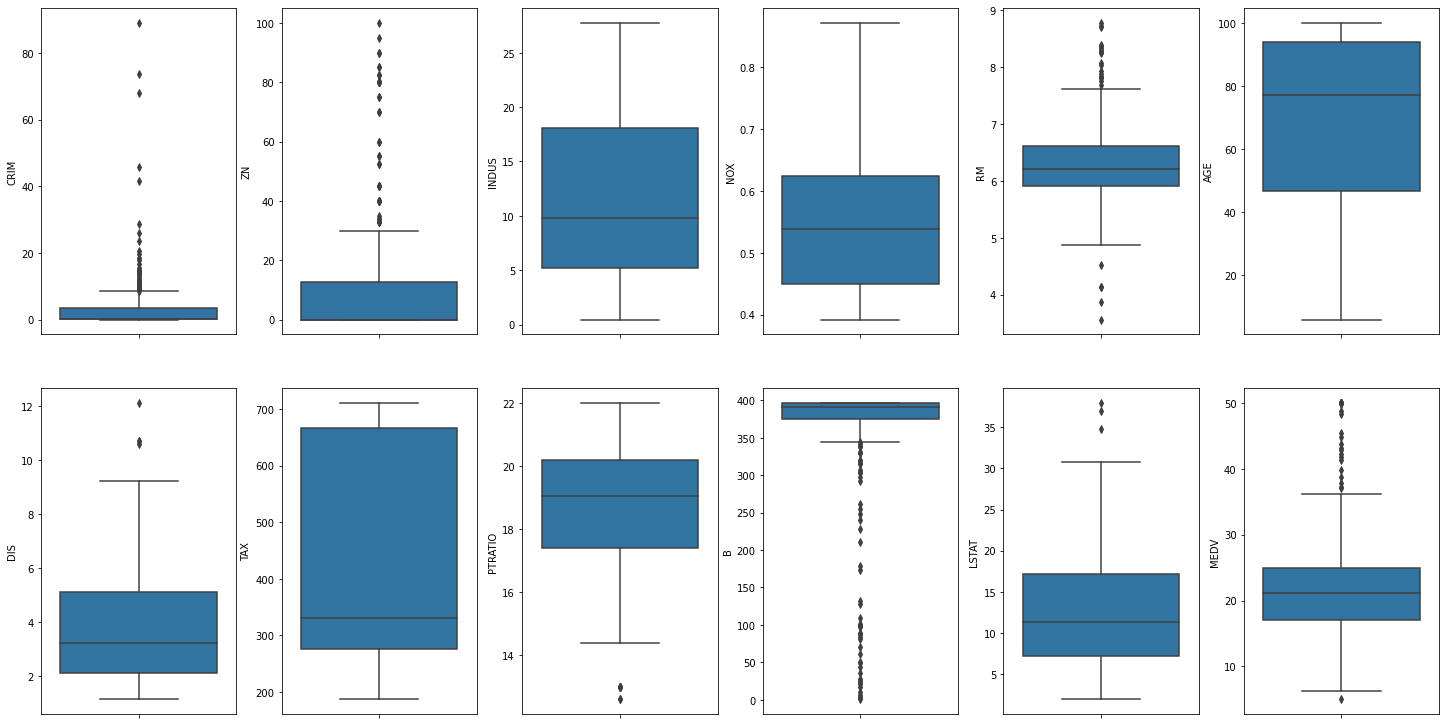

In [71]:
# boxplot data_train
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_data_train.items():
    sns.boxplot(y=k, data=num_data_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

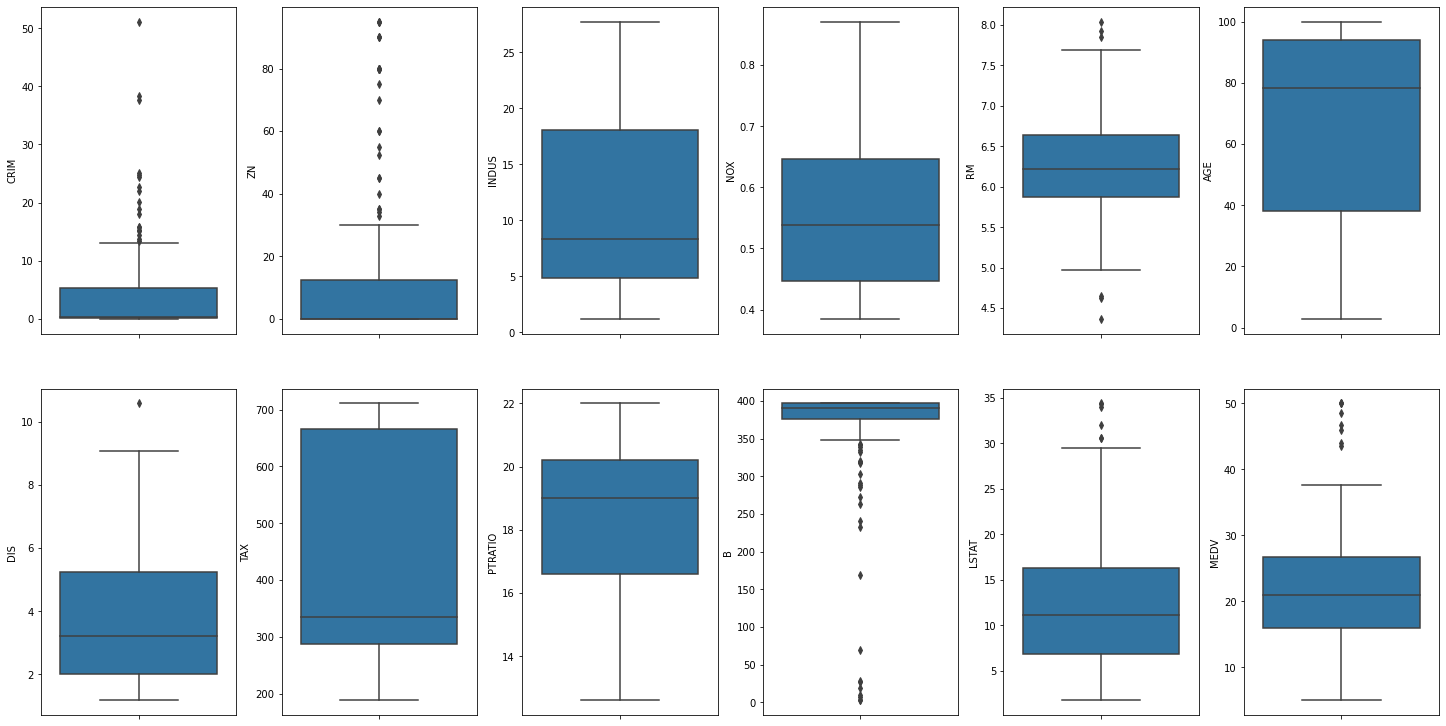

In [72]:
# boxplot data_test
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in num_data_test.items():
    sns.boxplot(y=k, data=num_data_test, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

En ambos gráficos se pueden observar que las columnas como CRIM, ZN, RM, B, PTRATIO, LSTAT y MEDV parecen tener altos valores atípicos. 

* **Aplicación de prueba de hipotesis**

Se comprobará si las variables del test y la del train siguen la misma distribución normal (forman una gausiana).

#### 1. Definir la Hipotesis:
* Comprobar que cada una de las variables numéricas siguen una distribución normal.

* H0 = Siguen distribucción normal

* H1 = No siguen distribucción normal

* Alpha = 0.05 (5%)

#### 2. Chequear las suposiciones:
* Comprobar si las observaciones en cada muestra son independientes e idénticamente distribuidas.

* Comprobar si la distribución de los goles a favor y en contra siguen una distribución normal. Se usará la prueba de normalidad de Shapiro-Wilk, que es generalmente para muestras pequeñas. La Hipótesis es:
     *  H₀: Los datos se distribuyen normalmente.
     *  H₁: los datos no se distribuyen normalmente.
        
* Las observaciones en cada muestra tienen la misma varianza.

In [73]:
def check_normal_distribution(data):
    for i in data.columns:
        shapiro_test = stats.shapiro(data[i])
        print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
        if shapiro_test.pvalue>0.05:
            print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
        else:
            print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')


In [74]:
check_normal_distribution(num_data_train)

La variable CRIM tiene un p-value=  1.0774194775869254e-32
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  4.1471789771812723e-29
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  4.5178033677376744e-14
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  3.6219081119698293e-12
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable RM tiene un p-value=  1.7606217872501162e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable AGE tiene un p-value=  9.213775372545786e-15
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable DIS tiene 

In [75]:
check_normal_distribution(num_data_test)

La variable CRIM tiene un p-value=  5.299389462988085e-19
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  2.6878220708660257e-19
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.374750202565167e-09
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  1.2948479707119986e-05
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable RM tiene un p-value=  0.22238440811634064
Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).

La variable AGE tiene un p-value=  7.767552157034174e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable DIS tiene un p-value= 

In [76]:
def check_varianza(data1,data2):
    for i in data1.columns:
        for j in data2.columns:
            test_stat_var, p_value_var= stats.levene(data1[i],data2[j])
        print('La variable del train ', i, 'y del test', i, 'tienen un p-value= ', p_value_var)
        if p_value_var <0.05:
            print("Reject null hypothesis >> The variances of the samples are different.\n")
        else:
            print("Fail to reject null hypothesis >> The variances of the samples are same.\n")

In [77]:
check_varianza(num_data_train,num_data_test)

La variable del train  CRIM y del test CRIM tienen un p-value=  9.108783170662831e-06
Reject null hypothesis >> The variances of the samples are different.

La variable del train  ZN y del test ZN tienen un p-value=  0.04366305327449905
Reject null hypothesis >> The variances of the samples are different.

La variable del train  INDUS y del test INDUS tienen un p-value=  0.09805798104135884
Fail to reject null hypothesis >> The variances of the samples are same.

La variable del train  NOX y del test NOX tienen un p-value=  5.146868514341148e-63
Reject null hypothesis >> The variances of the samples are different.

La variable del train  RM y del test RM tienen un p-value=  1.3021910410173476e-56
Reject null hypothesis >> The variances of the samples are different.

La variable del train  AGE y del test AGE tienen un p-value=  1.9743204721771607e-28
Reject null hypothesis >> The variances of the samples are different.

La variable del train  DIS y del test DIS tienen un p-value=  4.044

#### 3. Selección de la prueba:

* Se observa que tanto el train como el test no tienen distribucciones normales, sin embargo algunas variables como INDUS y MEDV poseen las varianzas similares.
* Se utilizará un test por datos No parametricas para mirar si las medias se parecen.
* Se aplicará el test Manwhaite U-test.

In [78]:
def check_mannwhitneyu(data1,data2):
    for i in data1.columns:
        for j in data2.columns:
            ttest,pvalue = stats.mannwhitneyu(data1[i],data2[j])
        print('La variable del train ', i, 'y del test ', i, 'tienen un p-value= ', pvalue)
        if pvalue > 0.05:
            print('Probably the same distribution.\n')
        else:
            print('Probably different distributions.\n')

In [79]:
check_mannwhitneyu(num_data_train,num_data_test)

La variable del train  CRIM y del test  CRIM tienen un p-value=  7.657397666920273e-62
Probably different distributions.

La variable del train  ZN y del test  ZN tienen un p-value=  1.1392724000393958e-32
Probably different distributions.

La variable del train  INDUS y del test  INDUS tienen un p-value=  1.355419047382379e-34
Probably different distributions.

La variable del train  NOX y del test  NOX tienen un p-value=  3.179972692558765e-71
Probably different distributions.

La variable del train  RM y del test  RM tienen un p-value=  1.8262696822492346e-67
Probably different distributions.

La variable del train  AGE y del test  AGE tienen un p-value=  9.838145037271007e-51
Probably different distributions.

La variable del train  DIS y del test  DIS tienen un p-value=  1.0131462637080779e-69
Probably different distributions.

La variable del train  TAX y del test  TAX tienen un p-value=  1.3064809224256724e-71
Probably different distributions.

La variable del train  PTRATIO y d

Se observa que solo la variable MEDV tanto en el test como en el train, tienen una misma distribucción normal, el resto de las variables no tiene  distribuccion normal en ninguna de los subconjuntos. Se graficará la varaible MEDV para comprobar los resultados.

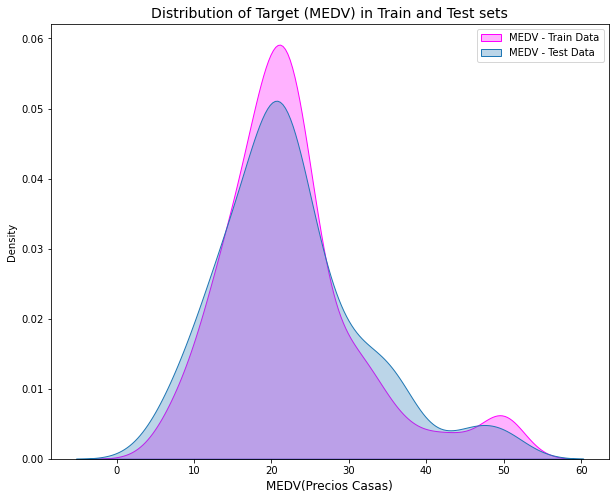

In [80]:
plt.figure(figsize= (10,8))

sns.kdeplot(num_data_train['MEDV'], label= 'MEDV - Train Data', color= 'magenta', fill = True, alpha = 0.30)
sns.kdeplot(num_data_test['MEDV'], label= 'MEDV - Test Data', fill = True, alpha= 0.30)

plt.xlabel('MEDV(Precios Casas)', fontsize=12)
plt.title('Distribution of Target (MEDV) in Train and Test sets', fontsize=14)
plt.legend()
plt.show()

### Análisis de los atributos categóricos

In [81]:
cat_data_train = data_train.select_dtypes('category')
cat_data_train

CHAS RAD
485    0  24
275    0   4
155    1   5
350    0   1
119    0   6
..   ...  ..
22     0   4
72     0   4
493    0   6
15     0   4
168    0   5

[354 rows x 2 columns]

In [82]:
cat_data_test = data_test.select_dtypes('category')
cat_data_test

CHAS RAD
463    0  24
152    1   5
291    0   4
183    0   3
384    0  24
..   ...  ..
30     0   4
348    0   4
10     0   5
283    1   1
17     0   4

[152 rows x 2 columns]

In [83]:
cat_data_train.describe()

CHAS  RAD
count    354  354
unique     2    9
top        0   24
freq     330   89

In [84]:
cat_data_test.describe()

CHAS  RAD
count    152  152
unique     2    9
top        0   24
freq     141   43

Se observa que existe similitud entre el análisis estadístico general, el del train y el del test de las variables categoricas. Se realizaran algunos graficos para confirmar.

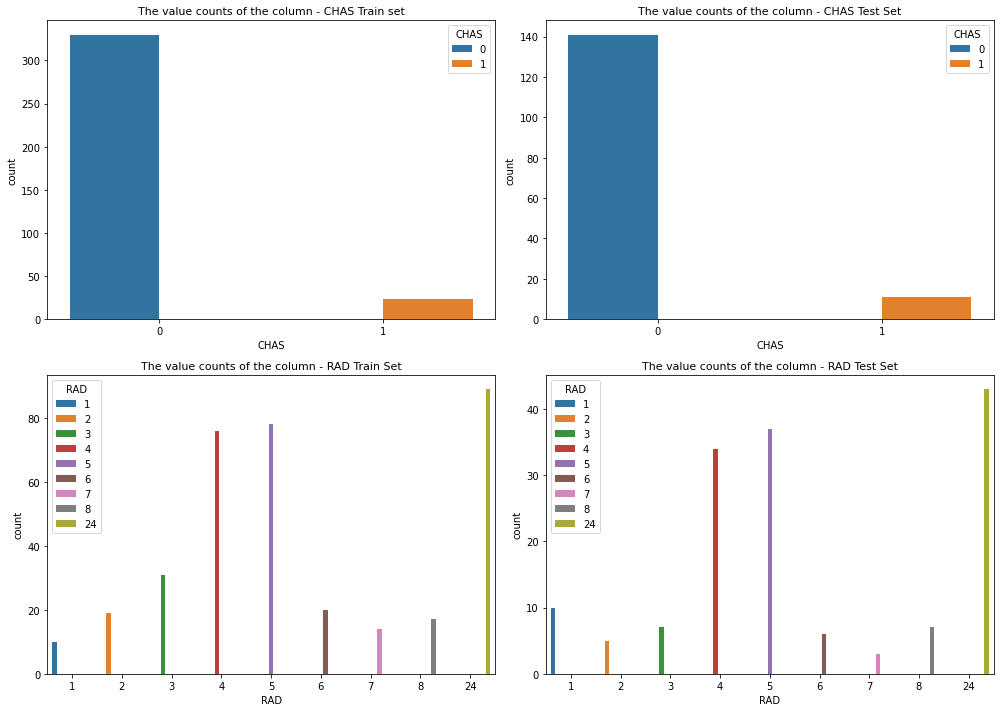

In [85]:
fig, axes = plt.subplots(2,2, figsize= (14,10))

sns.countplot(ax = axes[0,0], data = cat_data_train, x= 'CHAS', hue= 'CHAS')
axes[0,0].set_title('The value counts of the column - CHAS Train set', fontsize = 11)

sns.countplot(ax = axes[0,1], data = cat_data_test, x= 'CHAS',hue= 'CHAS')
axes[0,1].set_title('The value counts of the column - CHAS Test Set', fontsize = 11)

sns.countplot(ax = axes[1,0], data = cat_data_train, x= 'RAD', hue='RAD' )
axes[1,0].set_title('The value counts of the column - RAD Train Set', fontsize = 11)

sns.countplot(ax = axes[1,1], data = cat_data_test, x= 'RAD', hue='RAD' )
axes[1,1].set_title('The value counts of the column - RAD Test Set', fontsize = 11)

plt.tight_layout(); 

Los conjuntos Test y Train siguen los mismos patrones. Dado que para los próximos pasos se necesitaran los atributos numéricos se convertiran a numéricas nuevamente.

In [86]:
# change again str columns to numeric 
cols = ['CHAS', 'RAD']
for i in cols: 
    data_train[i] = data_train[i].astype('int64')
    data_test[i] = data_test[i].astype('int64')

data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 485 to 168
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    int64  
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    int64  
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  MEDV     354 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 41.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 463 to 17
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN      

* **Aplicación de prueba de hipotesis**

Se comprobará si las medias  del precio en función de la variable "CHAS" son iguales tanto en el subconjunto Train y el Test.

#### 1. Definir la Hipotesis:
* Comprobar si las medias  del precio en función de la variable "CHAS" son iguales tanto en el sub-conjunto Train y el Test.

* H0 = Las medias son iguales, estar cerca o lejos del río no afecta el precio de las casas.

* H1 = Las medias no son iguales, si afecta al precio de las casas la distancia del rio.

* Alpha = 0.05 (5%).

* Se crearan 2 dataset nuevos para comprobar la hipótesis, tanto para el train como para test

In [87]:
far_data_train = data_train[(data_train['CHAS'] == 0)]
near_data_train = data_train[(data_train['CHAS'] == 1)]

In [88]:
print ("Número de columnas y filas (Valor 0): ", far_data_train.shape)
print ("Número de columnas y filas(Valor 1): ", near_data_train.shape)

Número de columnas y filas (Valor 0):  (330, 14)
Número de columnas y filas(Valor 1):  (24, 14)


En vista que los nuevos datset no tienen la misma cantidad de muestras, se procedera a seleccionar 24 valores aleatorio para el far_data_train, dado que near_data_train tiene el valor mínimo.

In [89]:
far_data_train_s=far_data_train.sample(n= 24)

In [90]:
print ("Número de columnas y filas: ", far_data_train_s.shape)

Número de columnas y filas:  (24, 14)


#### 2. Chequear las suposiciones:
* Comprobar si las observaciones en cada muestra son independientes e idénticamente distribuidas.

* Comprobar si la distribución de los partidos por grupo de score siguen una distribución normal. Se usará la prueba de normalidad de Shapiro-Wilk, que es generalmente para muestras pequeñas. La Hipótesis es:
     *  H₀: Los datos se distribuyen normalmente.
     *  H₁: los datos no se distribuyen normalmente.
        
* Las observaciones en cada muestra tienen la misma varianza.

In [91]:
# create a function that checks if the distribution is normal: 
def check_normal_distrib(data): 
    stat, p_value_norm = shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
    if p_value_norm < 0.05 : 
        mensaje = "Rechazar la hipótesis nula al 95 % de nivel de significancia > Los datos no se distribuyen normalmente."
    else: 
        mensaje = "No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente."
    return mensaje

In [92]:
# check normal distribution far_data_train_s
check_normal_distrib(far_data_train_s['MEDV'])

stat=0.949, p=0.260


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

In [93]:
# check normal distribution near_data_train
check_normal_distrib(near_data_train['MEDV'])

stat=0.849, p=0.002


'Rechazar la hipótesis nula al 95 % de nivel de significancia > Los datos no se distribuyen normalmente.'

In [94]:
## Define a function to check variance for checking variance homogeneity
# Levene’s test  

def check_variance_homoge(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rechaza la hipótesis nula >> Las varianzas de las muestras son diferentes")
    else:
        print("No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas")

In [95]:
check_variance_homoge(far_data_train_s['MEDV'], near_data_train['MEDV'])

p value:0.0887
No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas


Dado que no se cumplen las suposiciones, podemos realizar la versión paramétrica de la prueba para más de 2 grupos y datos no apareados.

#### 3. Selección de la prueba:
* Los datos no siguen una distribución normal, aunque las varianzas son similares, por tanto se utilizará un test para datos no-paramétricos.
* Se utilizará U Mann-Whitney para testear si las distribuciones de dos variables son iguales o no.

In [96]:
## Mann White U test
stat, p_value = mannwhitneyu(far_data_train_s['MEDV'], near_data_train['MEDV'])
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print('Probablemente la misma distribución.')
else:
    print('Probablemente diferentes distribuciones.')

 Mann–Whitney U Test: statistic=174.0000, p-value=0.0192
Probablemente diferentes distribuciones.


De acuerdo a los resultados obtenidos probablemente no tienen la misma distribución, por lo que se infiere que estar cerca de rio o lejos si afecta el precio de las casas.

* **Esta prueba de hipotesis se aplicará al data set del test, con las mismas premisas**

In [97]:
far_data_test = data_test[(data_test['CHAS'] == 0)]
near_data_test = data_test[(data_test['CHAS'] == 1)]

In [98]:
print ("Número de columnas y filas (Valor 0): ", far_data_test.shape)
print ("Número de columnas y filas(Valor 1): ", near_data_test.shape)

Número de columnas y filas (Valor 0):  (141, 14)
Número de columnas y filas(Valor 1):  (11, 14)


En vista que los nuevos datset no tienen la misma cantidad de muestras, se procedera a seleccionar 24 valores aleatorio para el far_data_train, dado que near_data_train tiene el valor mínimo.

In [99]:
far_data_test_s=far_data_test.sample(n= 11)

In [101]:
print ("Número de columnas y filas: ", far_data_test_s.shape)

Número de columnas y filas:  (11, 14)


In [102]:
# comprobar suposiciones
# check normal distribution far_data_test
check_normal_distrib(far_data_test_s['MEDV'])

stat=0.905, p=0.215


'No se puede rechazar la hipótesis nula al 95 % del nivel de significación >Los datos se distribuyen normalmente.'

In [103]:
# check normal distribution near_data_test
check_normal_distrib(near_data_test['MEDV'])

stat=0.799, p=0.009


'Rechazar la hipótesis nula al 95 % de nivel de significancia > Los datos no se distribuyen normalmente.'

In [104]:
check_variance_homoge(far_data_test_s['MEDV'], near_data_test['MEDV'])

p value:0.2757
No se puede rechazar la hipótesis nula >> Las varianzas de las muestras son las mismas


Dado que no se cumplen las suposiciones, se aplicará el U Mann-Whitney para testear si las distribuciones de dos variables son iguales o no.

In [105]:
## Mann White U test
stat, p_value = mannwhitneyu(far_data_train_s['MEDV'], near_data_train['MEDV'])
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

if p_value > 0.05:
    print('Probablemente la misma distribución.')
else:
    print('Probablemente diferentes distribuciones.')

 Mann–Whitney U Test: statistic=174.0000, p-value=0.0192
Probablemente diferentes distribuciones.


Se observa que los resultados fueron parecidos a la hipotesis apliacada al sub conjunto dle train, por lo que se infiere que estar cerca o lejos de rio si afecta el precio de las casas. Se realizará un grafico para confirmar los resultados.

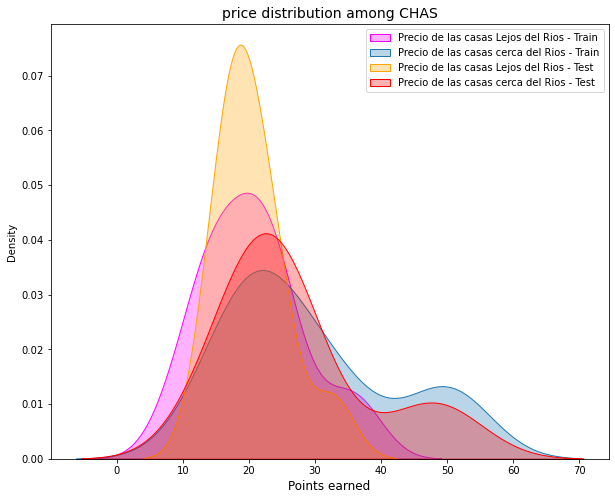

In [106]:
plt.figure(figsize= (10,8))

sns.kdeplot(far_data_train_s['MEDV'], label= 'Precio de las casas Lejos del Rios - Train', color= 'magenta', 
            fill = True, alpha = 0.30)
sns.kdeplot(near_data_train['MEDV'], label= 'Precio de las casas cerca del Rios - Train', fill = True, alpha= 0.30)
sns.kdeplot(far_data_test_s['MEDV'], label= 'Precio de las casas Lejos del Rios - Test', color= 'orange', 
            fill = True, alpha = 0.30)
sns.kdeplot(near_data_test['MEDV'], label= 'Precio de las casas cerca del Rios - Test',color= 'red', fill = True, alpha= 0.30)

plt.xlabel('Points earned', fontsize=12)
plt.title('price distribution among CHAS', fontsize=14)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>Ejercicio 2:</b> Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).
</div>

*  Dado que las variables numéricas independientes no tienen distribucción normal o gausiona se le aplicaran normalización:
    * Outliers:**'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'** se le aplicará **RobustScaler**.
    * No outliers: **'INDUS', 'NOX', 'TAX', 'AGE'** se le aplicará **MinMaxScaler**.
* La variable "CHAS" al ser un dummie, está lista para un entrenamiento de Machine learning por lo que no se realizará ninguna transformación.
* A la variable RAD se realizará un encode.

* **Transformación al dataset del Train**

In [109]:
train_transf = data_train.copy()

* **Transformación de las variables independientes**

In [110]:
#MinMaxScaler for variables without outliers
minmax_col = ['INDUS', 'NOX', 'TAX', 'AGE']
trans = MinMaxScaler()
train_transf[minmax_col] = trans.fit_transform(train_transf[minmax_col])
train_transf.head()

CRIM    ZN     INDUS  CHAS       NOX     RM       AGE     DIS  RAD  \
485  3.67367   0.0  0.646628     0  0.398747  6.312  0.488298  3.9917   24   
275  0.09604  40.0  0.218109     0  0.114823  6.854  0.391489  4.2673    4   
155  3.53501   0.0  0.700880     1  1.000000  6.152  0.814894  1.7455    5   
350  0.06211  40.0  0.028959     0  0.077244  6.490  0.408511  8.7921    1   
119  0.14476   0.0  0.350073     0  0.323591  5.731  0.629787  2.7592    6   

          TAX  PTRATIO       B  LSTAT  MEDV  
485  0.914122     20.2  388.62  10.58  21.2  
275  0.127863     17.6  396.90   2.98  32.0  
155  0.412214     14.7   88.01  15.02  15.6  
350  0.282443     19.7  396.90   5.98  22.9  
119  0.467557     17.8  391.50  13.61  19.3

In [111]:
#RobustScaler for variables with outliers
robust_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
Robust_scaler = preprocessing.RobustScaler().fit(train_transf[robust_col])
train_transf[robust_col] = Robust_scaler.transform(train_transf[robust_col])


train_transf.head()

CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
485  0.999128  0.0  0.646628     0  0.398747  0.155524  0.488298  0.260984   
275 -0.041912  3.2  0.218109     0  0.114823  0.918367  0.391489  0.352698   
155  0.958780  0.0  0.700880     1  1.000000 -0.069669  0.814894 -0.486510   
350 -0.051785  3.2  0.028959     0  0.077244  0.406052  0.408511  1.858468   
119 -0.027735  0.0  0.350073     0  0.323591 -0.662210  0.629787 -0.149169   

     RAD       TAX   PTRATIO          B     LSTAT  MEDV  
485   24  0.914122  0.410714  -0.152358 -0.079440  21.2  
275    4  0.127863 -0.517857   0.248126 -0.838871  32.0  
155    5  0.412214 -1.553571 -14.692140  0.364227  15.6  
350    1  0.282443  0.232143   0.248126 -0.539096  22.9  
119    6  0.467557 -0.446429  -0.013059  0.223333  19.3

* **Encoding de la variable RAD**

In [112]:
#One Hot Encoding the columns
train_transf = pd.get_dummies(data = train_transf, columns= ['RAD'])
train_transf

CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
485  0.999128  0.0  0.646628     0  0.398747  0.155524  0.488298  0.260984   
275 -0.041912  3.2  0.218109     0  0.114823  0.918367  0.391489  0.352698   
155  0.958780  0.0  0.700880     1  1.000000 -0.069669  0.814894 -0.486510   
350 -0.051785  3.2  0.028959     0  0.077244  0.406052  0.408511  1.858468   
119 -0.027735  0.0  0.350073     0  0.323591 -0.662210  0.629787 -0.149169   
..        ...  ...       ...   ...       ...       ...       ...       ...   
22   0.288773  0.0  0.281525     0  0.304802 -0.083744  0.911702  0.256059   
72  -0.043192  0.0  0.379399     0  0.043841 -0.192118  0.019149  0.692136   
493 -0.019428  0.0  0.338343     0  0.402923 -0.695989  0.510638 -0.274794   
15   0.112703  0.0  0.281525     0  0.304802 -0.517241  0.537234  0.429671   
168  0.599526  0.0  0.700880     0  0.444676  0.165376  0.958511 -0.368539   

          TAX   PTRATIO  ...  MEDV  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  \
485  0.914122  0.410714  ...  21.2      0      0      0      0      0      0   
275  0.127863 -0.517857  ...  32.0      0      0      0      1      0      0   
155  0.412214 -1.553571  ...  15.6      0      0      0      0      1      0   
350  0.282443  0.232143  ...  22.9      1      0      0      0      0      0   
119  0.467557 -0.446429  ...  19.3      0      0      0      0      0      1   
..        ...       ...  ...   ...    ...    ...    ...    ...    ...    ...   
22   0.229008  0.696429  ...  15.2      0      0      0      1      0      0   
72   0.225191  0.053571  ...  22.8      0      0      0      1      0      0   
493  0.389313  0.053571  ...  21.8      0      0      0      0      0      1   
15   0.229008  0.696429  ...  19.9      0      0      0      1      0      0   
168  0.412214 -1.553571  ...  23.8      0      0      0      0      1      0   

     RAD_7  RAD_8  RAD_24  
485      0      0       1  
275      0      0       0  
155      0      0       0  
350      0      0       0  
119      0      0       0  
..     ...    ...     ...  
22       0      0       0  
72       0      0       0  
493      0      0       0  
15       0      0       0  
168      0      0       0  

[354 rows x 22 columns]

Como se puede observar se crearon 9 columnas con la variable RAD, debido a los 

* **Crear la variable target al dataset nuevo del train**

In [116]:
# Create the column - Target using MEDV
target_data = train_transf['MEDV']
train_transf['Target'] = target_data

In [117]:
# Dropping the column - MEDV
train_transf.drop(['MEDV'], axis = 1, inplace = True)
train_transf

CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
485  0.999128  0.0  0.646628     0  0.398747  0.155524  0.488298  0.260984   
275 -0.041912  3.2  0.218109     0  0.114823  0.918367  0.391489  0.352698   
155  0.958780  0.0  0.700880     1  1.000000 -0.069669  0.814894 -0.486510   
350 -0.051785  3.2  0.028959     0  0.077244  0.406052  0.408511  1.858468   
119 -0.027735  0.0  0.350073     0  0.323591 -0.662210  0.629787 -0.149169   
..        ...  ...       ...   ...       ...       ...       ...       ...   
22   0.288773  0.0  0.281525     0  0.304802 -0.083744  0.911702  0.256059   
72  -0.043192  0.0  0.379399     0  0.043841 -0.192118  0.019149  0.692136   
493 -0.019428  0.0  0.338343     0  0.402923 -0.695989  0.510638 -0.274794   
15   0.112703  0.0  0.281525     0  0.304802 -0.517241  0.537234  0.429671   
168  0.599526  0.0  0.700880     0  0.444676  0.165376  0.958511 -0.368539   

          TAX   PTRATIO  ...  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  \
485  0.914122  0.410714  ...      0      0      0      0      0      0      0   
275  0.127863 -0.517857  ...      0      0      0      1      0      0      0   
155  0.412214 -1.553571  ...      0      0      0      0      1      0      0   
350  0.282443  0.232143  ...      1      0      0      0      0      0      0   
119  0.467557 -0.446429  ...      0      0      0      0      0      1      0   
..        ...       ...  ...    ...    ...    ...    ...    ...    ...    ...   
22   0.229008  0.696429  ...      0      0      0      1      0      0      0   
72   0.225191  0.053571  ...      0      0      0      1      0      0      0   
493  0.389313  0.053571  ...      0      0      0      0      0      1      0   
15   0.229008  0.696429  ...      0      0      0      1      0      0      0   
168  0.412214 -1.553571  ...      0      0      0      0      1      0      0   

     RAD_8  RAD_24  Target  
485      0       1    21.2  
275      0       0    32.0  
155      0       0    15.6  
350      0       0    22.9  
119      0       0    19.3  
..     ...     ...     ...  
22       0       0    15.2  
72       0       0    22.8  
493      0       0    21.8  
15       0       0    19.9  
168      0       0    23.8  

[354 rows x 22 columns]

In [118]:
train_transf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 485 to 168
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    int64  
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   TAX      354 non-null    float64
 9   PTRATIO  354 non-null    float64
 10  B        354 non-null    float64
 11  LSTAT    354 non-null    float64
 12  RAD_1    354 non-null    uint8  
 13  RAD_2    354 non-null    uint8  
 14  RAD_3    354 non-null    uint8  
 15  RAD_4    354 non-null    uint8  
 16  RAD_5    354 non-null    uint8  
 17  RAD_6    354 non-null    uint8  
 18  RAD_7    354 non-null    uint8  
 19  RAD_8    354 non-null    uint8  
 20  RAD_24   354 non-null    uint8  
 21  Target   354 n

<div class="alert alert-block alert-info">
<b>Ejercicio 3:</b> Resume las nuevas columnas generadas de forma estadística y gráfica.
</div>

In [120]:
train_transf.describe().round(3).T

count    mean    std     min     25%     50%     75%     max
CRIM     354.0   0.905  2.559  -0.068  -0.046   0.000   0.954  25.821
ZN       354.0   0.833  1.733   0.000   0.000   0.000   1.000   8.000
INDUS    354.0   0.397  0.252   0.000   0.173   0.342   0.647   1.000
CHAS     354.0   0.068  0.252   0.000   0.000   0.000   0.000   1.000
NOX      354.0   0.338  0.240   0.000   0.121   0.305   0.484   1.000
RM       354.0   0.131  1.013  -3.716  -0.414   0.000   0.586   3.629
AGE      354.0   0.673  0.291   0.000   0.434   0.755   0.937   1.000
DIS      354.0   0.194  0.708  -0.691  -0.366   0.000   0.634   2.968
TAX      354.0   0.417  0.320   0.000   0.172   0.273   0.914   1.000
PTRATIO  354.0  -0.192  0.743  -2.304  -0.589   0.000   0.411   1.054
B        354.0  -1.750  4.496 -18.933  -0.800   0.000   0.200   0.248
LSTAT    354.0   0.126  0.700  -0.945  -0.422   0.000   0.578   2.658
RAD_1    354.0   0.028  0.166   0.000   0.000   0.000   0.000   1.000
RAD_2    354.0   0.054  0.226   0.000   0.000   0.000   0.000   1.000
RAD_3    354.0   0.088  0.283   0.000   0.000   0.000   0.000   1.000
RAD_4    354.0   0.215  0.411   0.000   0.000   0.000   0.000   1.000
RAD_5    354.0   0.220  0.415   0.000   0.000   0.000   0.000   1.000
RAD_6    354.0   0.056  0.231   0.000   0.000   0.000   0.000   1.000
RAD_7    354.0   0.040  0.195   0.000   0.000   0.000   0.000   1.000
RAD_8    354.0   0.048  0.214   0.000   0.000   0.000   0.000   1.000
RAD_24   354.0   0.251  0.434   0.000   0.000   0.000   0.750   1.000
Target   354.0  22.573  9.157   5.000  17.125  21.200  24.950  50.000

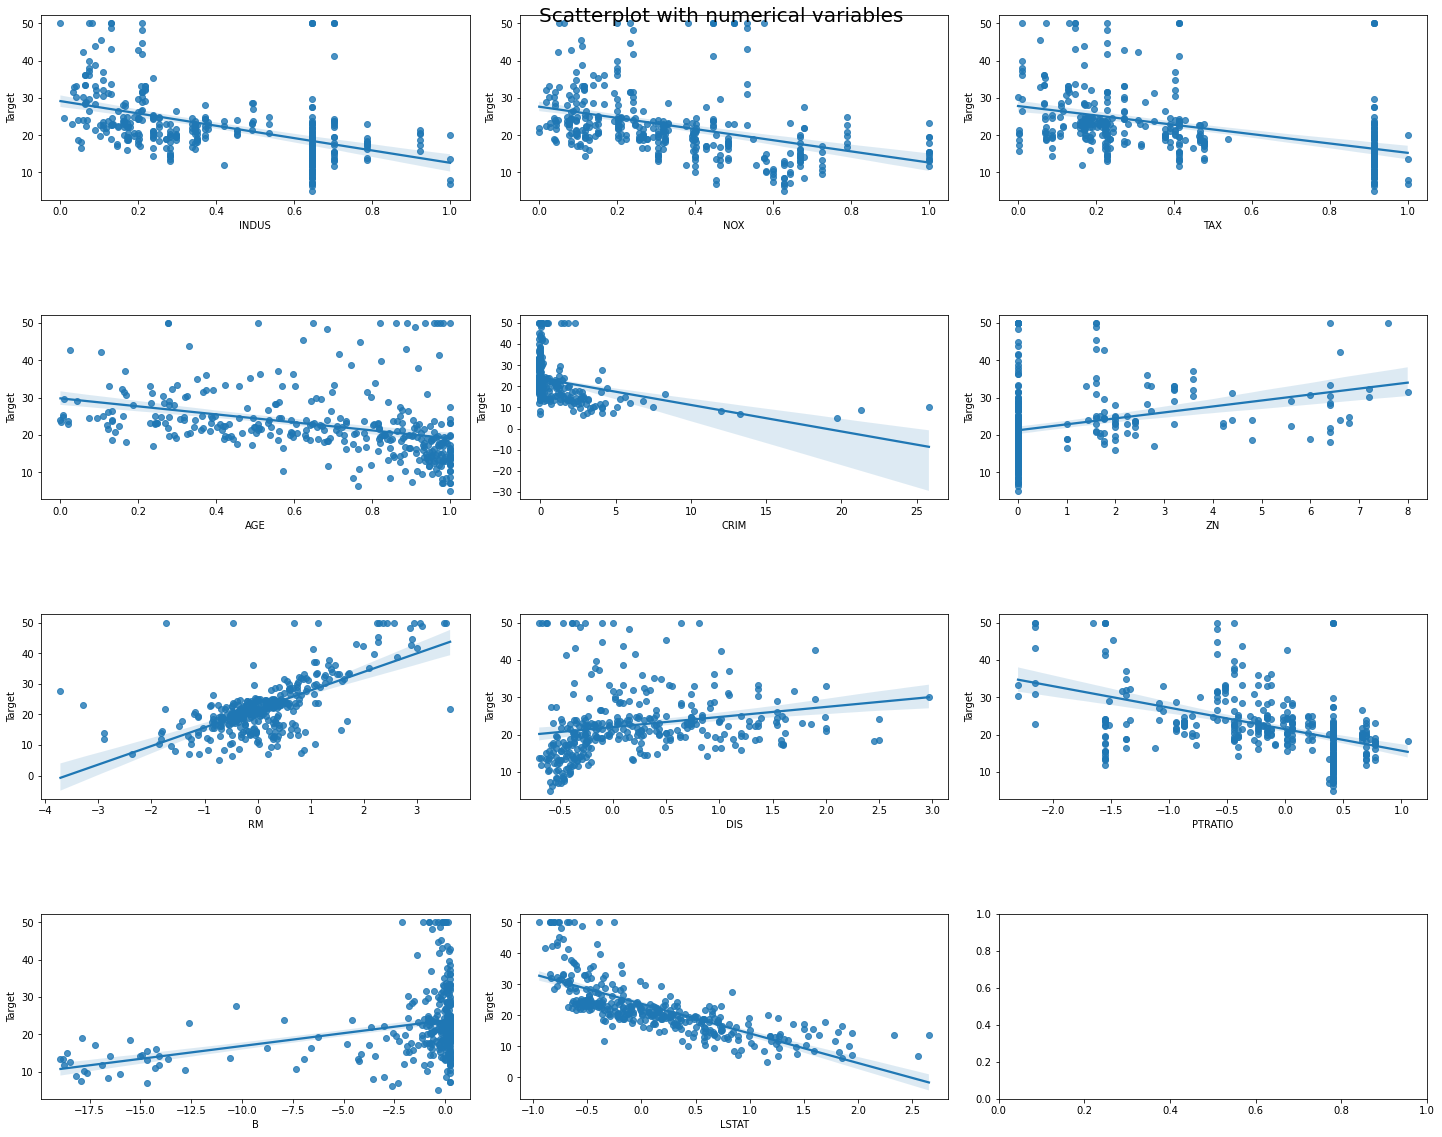

In [128]:
column_sels = ['INDUS', 'NOX', 'TAX', 'AGE', 'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
x = train_transf.loc[:,column_sels]
y = train_transf['Target']
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 16))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
fig.suptitle('Scatterplot with numerical variables', fontsize=20)
plt.tight_layout(pad=0.6, w_pad=0.8, h_pad=8.0)

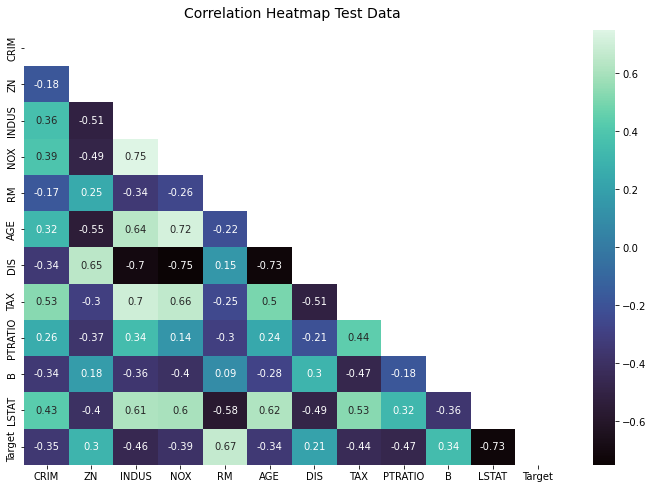

In [142]:
# Heatmap on data_test

train_transf_num = train_transf.select_dtypes('float64')

plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(train_transf_num.corr().round(2))) 

ax= sns.heatmap( train_transf_num.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap Test Data', fontdict={'fontsize':14}, pad=12);

<h3>Observaciones:</h3>

   * Se puede observa que a pesar de ser datos escalados, se mantiene que los atributos RM y LSTAT, son las que tienen mejor correlación, con el atributo target (MEDV). 
   * El resto de las variables probablemete requieran otro de tipo de transformación. 
   * Adicionalmente en el Scatter plot se puede observar que aun continuan la presencia de altos valores de atipicos(ouliers), por lo que se pueden eliminar el sesgo a traves de una log transformation de los datos.

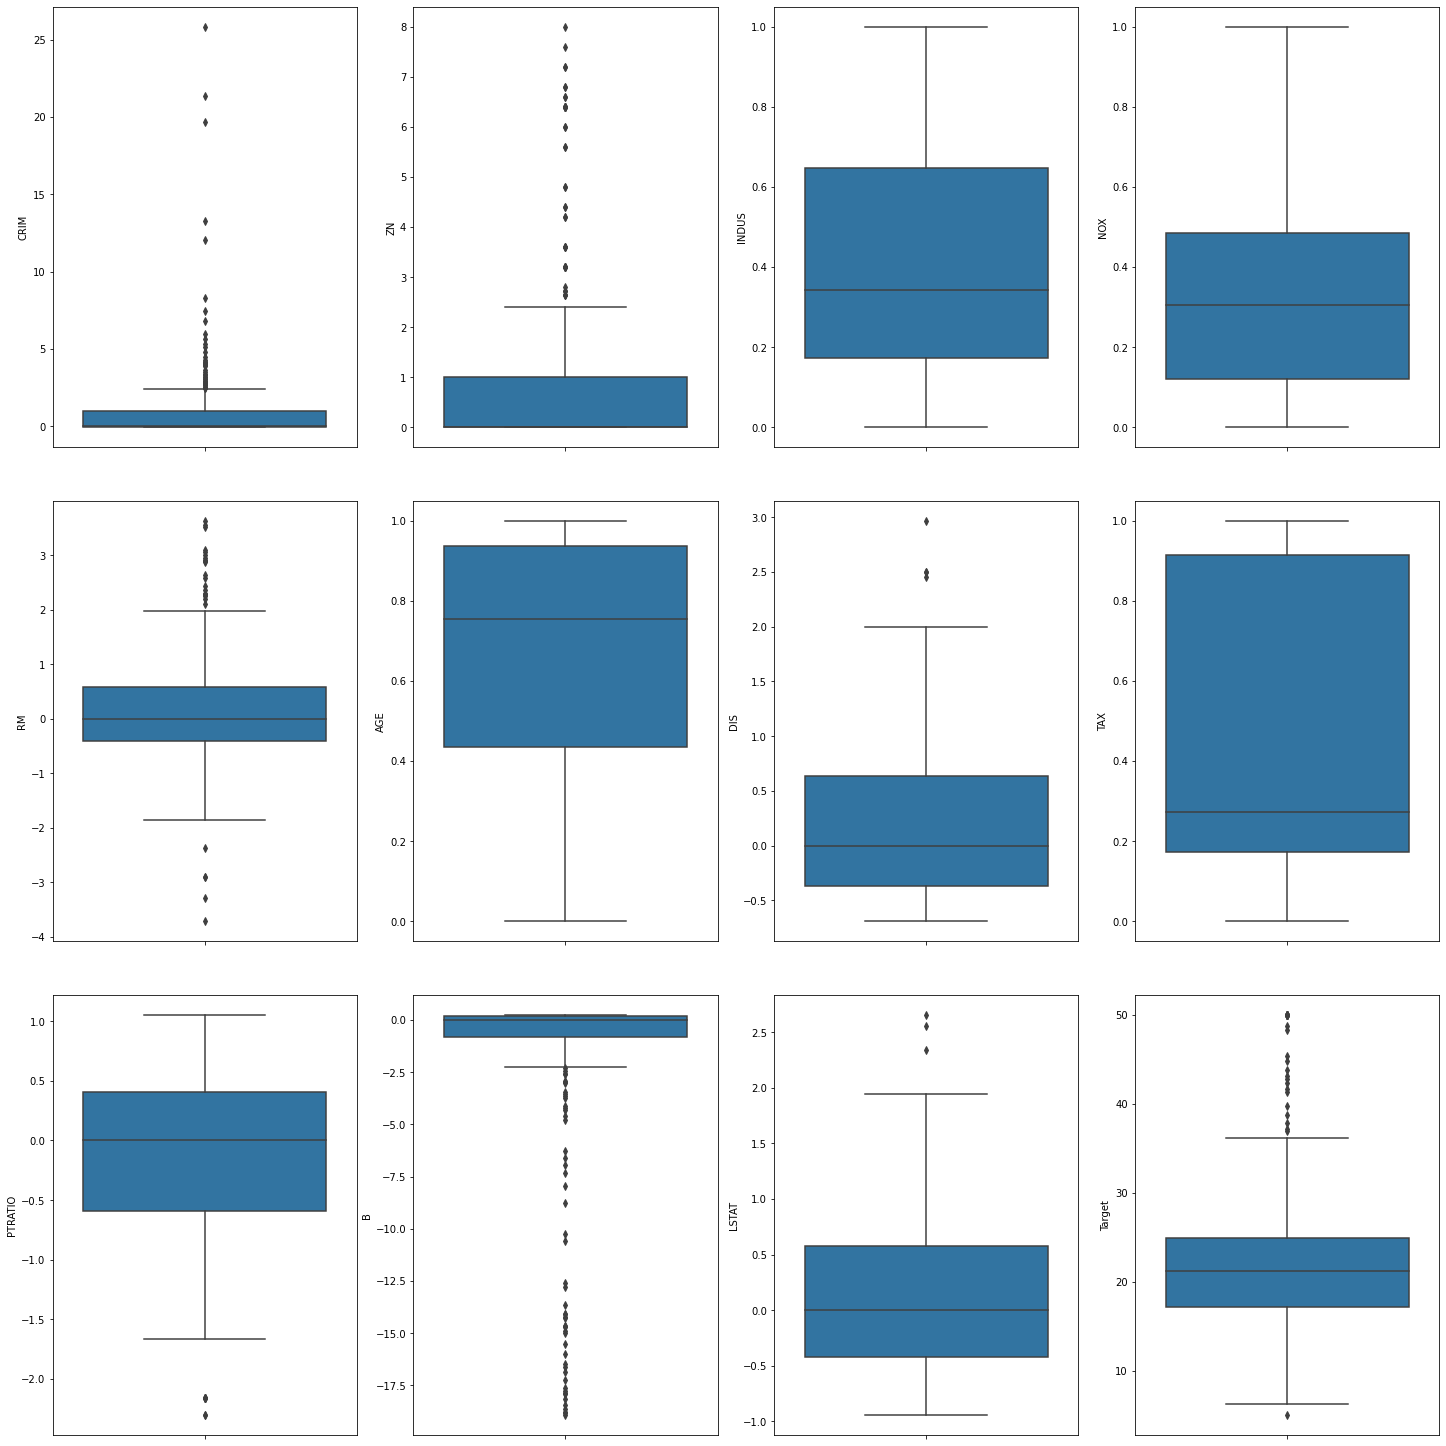

In [143]:
# boxplot data_train_transf with numerical variable
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in  train_transf_num.items():
    sns.boxplot(y=k, data= train_transf, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Aunque se aplicó transformación robuscale para mejorar los outliers en algunas variables se puede observar que en las Variable "CRIN", "ZN", "RM", "B" no hubo una mejora significativa, mantiene altos valores tomando en cuenta que son datos escalados, por lo que es probable requiera otro tipo de trasformación o aplicar imputación por outliers.